In [ ]:
Project Description
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 
Independent Variables:
1.	Loan_ID - This refer to the unique identifier of the applicant's affirmed purchases
2.	Gender - This refers to either of the two main categories (male and female) into which applicants are divided on the basis of their reproductive functions
3.	Married - This refers to applicant being in a state of matrimony
4.	Dependents - This refres to persons who depends on the applicants for survival
5.	Education - This refers to number of years in which applicant received systematic instruction, especially at a school or university
6.	Self_Employed - This refers to applicant working for oneself as a freelancer or the owner of a business rather than for an employer
7.	Applicant Income - This refers to disposable income available for the applicant's use under State law.
8.	CoapplicantIncome - This refers to disposable income available for the people that participate in the loan application process alongside the main applicant use under State law.
9.	Loan_Amount - This refers to the amount of money an applicant owe at any given time.
10.	Loan_Amount_Term - This refers to the duaration in which the loan is availed to the applicant
11.	Credit History - This refers to a record of applicant's ability to repay debts and demonstrated responsibility in repaying them.
12.	Property_Area - This refers to the total area within the boundaries of the property as set out in Schedule.
13.	Loan_Status - This refres to whether applicant is eligible to be availed the Loan requested.
You have to build a model that can predict whether the loan of the applicant will be approved(Loan_status) or not on the basis of the details provided in the dataset. 

There are  only two expected outcomes.This is a binary classification problem


In [1]:
#Import the necessary libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the data
df=pd.read_csv(r"C:\Users\bee\Desktop\Data set\loan_prediction.csv")

In [3]:
#first five records of the data
df.head()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [4]:
#last five records of the data
df.tail()

,LP001002,Male,No,0,Graduate,No.1,5849,0.1,Unnamed: 8,360,1,Urban,Y
608,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
612,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
#checking the shape of the data
#there are 613 rows and 13 columns
df.shape

(613, 13)

In [7]:
df.dtypes#Checking the data types of all columns

LP001002       object
Male           object
No             object
0              object
Graduate       object
No.1           object
5849            int64
0.1           float64
Unnamed: 8    float64
360           float64
1             float64
Urban          object
Y              object
dtype: object

In [8]:
#Renaming columns according to what is provided in the project description
column_names = ['Loan_ID','Gender','Married','Dependents','Education','Self_Employed','Applicant Income','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit History','Property_Area','Loan_Status']
df.columns = column_names
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


In [9]:
#Now that the column names are clear,we see that the Loan_ID column has no impact on the prediction required,it is a mere label therefore unnecessary,we drop it
#Dropping irrelevant columns which are simply labels
df.drop(columns= ['Loan_ID'], axis = 1, inplace = True)

In [10]:
#checking if the Loan_ID column has been removed
df

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...
608,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
609,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
610,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
611,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [11]:
df.shape#check the shape of the date after removing and changing columns

(613, 12)

In [12]:
#printing a list of columns to have a clear view of columns in the dataset
df.columns.tolist()

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Applicant Income',
 'CoapplicantIncome',
 'Loan_Amount',
 'Loan_Amount_Term',
 'Credit History',
 'Property_Area',
 'Loan_Status']

In [13]:
#Checking information about the dataset
df.info()
#there are 12 columns in the data,4 of contain are Float64 data,7 are object and 1 is int64.The data uses less than 1MB memory

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             600 non-null    object 
 1   Married            610 non-null    object 
 2   Dependents         598 non-null    object 
 3   Education          613 non-null    object 
 4   Self_Employed      581 non-null    object 
 5   Applicant Income   613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        592 non-null    float64
 8   Loan_Amount_Term   599 non-null    float64
 9   Credit History     563 non-null    float64
 10  Property_Area      613 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.6+ KB


In [14]:
#checking why a column is labelled to contain object data instead of it being float
df['Dependents'].unique()

array(['1', '0', '2', '3+', nan], dtype=object)

In [15]:
#replacing object data with null values
df["Dependents"]=df["Dependents"].replace("3+",np.nan)
df["Dependents"].value_counts()

Dependents
0    344
1    102
2    101
Name: count, dtype: int64

In [16]:
#changing column from object to float
df["Dependents"]=df["Dependents"].astype(float)

In [17]:
#check if data type has changed
df["Dependents"].dtype

dtype('float64')

In [18]:
#Checking Duplicate value in data set
print("Total Duplicate Rows are",df.duplicated().sum())# no duplicates

Total Duplicate Rows are 0


In [19]:
#Checking unique values of each columns
df.nunique().to_frame("No. of Unique values")#I can clearly see the number of uniques values per each column

,No. of Unique values
Gender,2
Married,2
Dependents,3
Education,2
Self_Employed,2
Applicant Income,504
CoapplicantIncome,287
Loan_Amount,203
Loan_Amount_Term,10
Credit History,2


In [20]:
#checking the value of count of each column(this is to get count of frequency of each unique value in column)
for i in df.columns:
    print(df[i].value_counts())
    print("\n")

Gender
Male      488
Female    112
Name: count, dtype: int64


Married
Yes    398
No     212
Name: count, dtype: int64


Dependents
0.0    344
1.0    102
2.0    101
Name: count, dtype: int64


Education
Graduate        479
Not Graduate    134
Name: count, dtype: int64


Self_Employed
No     499
Yes     82
Name: count, dtype: int64


Applicant Income
2500    9
4583    6
2600    6
6000    6
5000    5
       ..
3244    1
4408    1
3917    1
3992    1
7583    1
Name: count, Length: 504, dtype: int64


CoapplicantIncome
0.0       272
2500.0      5
2083.0      5
1666.0      5
1459.0      3
         ... 
2791.0      1
1010.0      1
1695.0      1
2598.0      1
240.0       1
Name: count, Length: 287, dtype: int64


Loan_Amount
120.0    20
110.0    17
100.0    15
160.0    12
187.0    12
         ..
240.0     1
214.0     1
59.0      1
166.0     1
253.0     1
Name: count, Length: 203, dtype: int64


Loan_Amount_Term
360.0    511
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.

In [ ]:
Gender-the most frequent gender is male with 488 occurences
Married-majority (398) are married
Dependents-most of the prospets have no dependents
Education-most people are graduates
Self_Employed-majority are not self employed
Applicant Income-the most frequent income is 2500
CoapplicantIncome-majotity of coapplicants do not have an income
Loan_Amount-most common loan amount is 120
Loan_Amount_term-the most common loan term is 360 days
Credit History-majority have a score of 1
Property_Area-most applicants come from Semi Urban areas
Loan_Status-most applications were approved denoted by Y

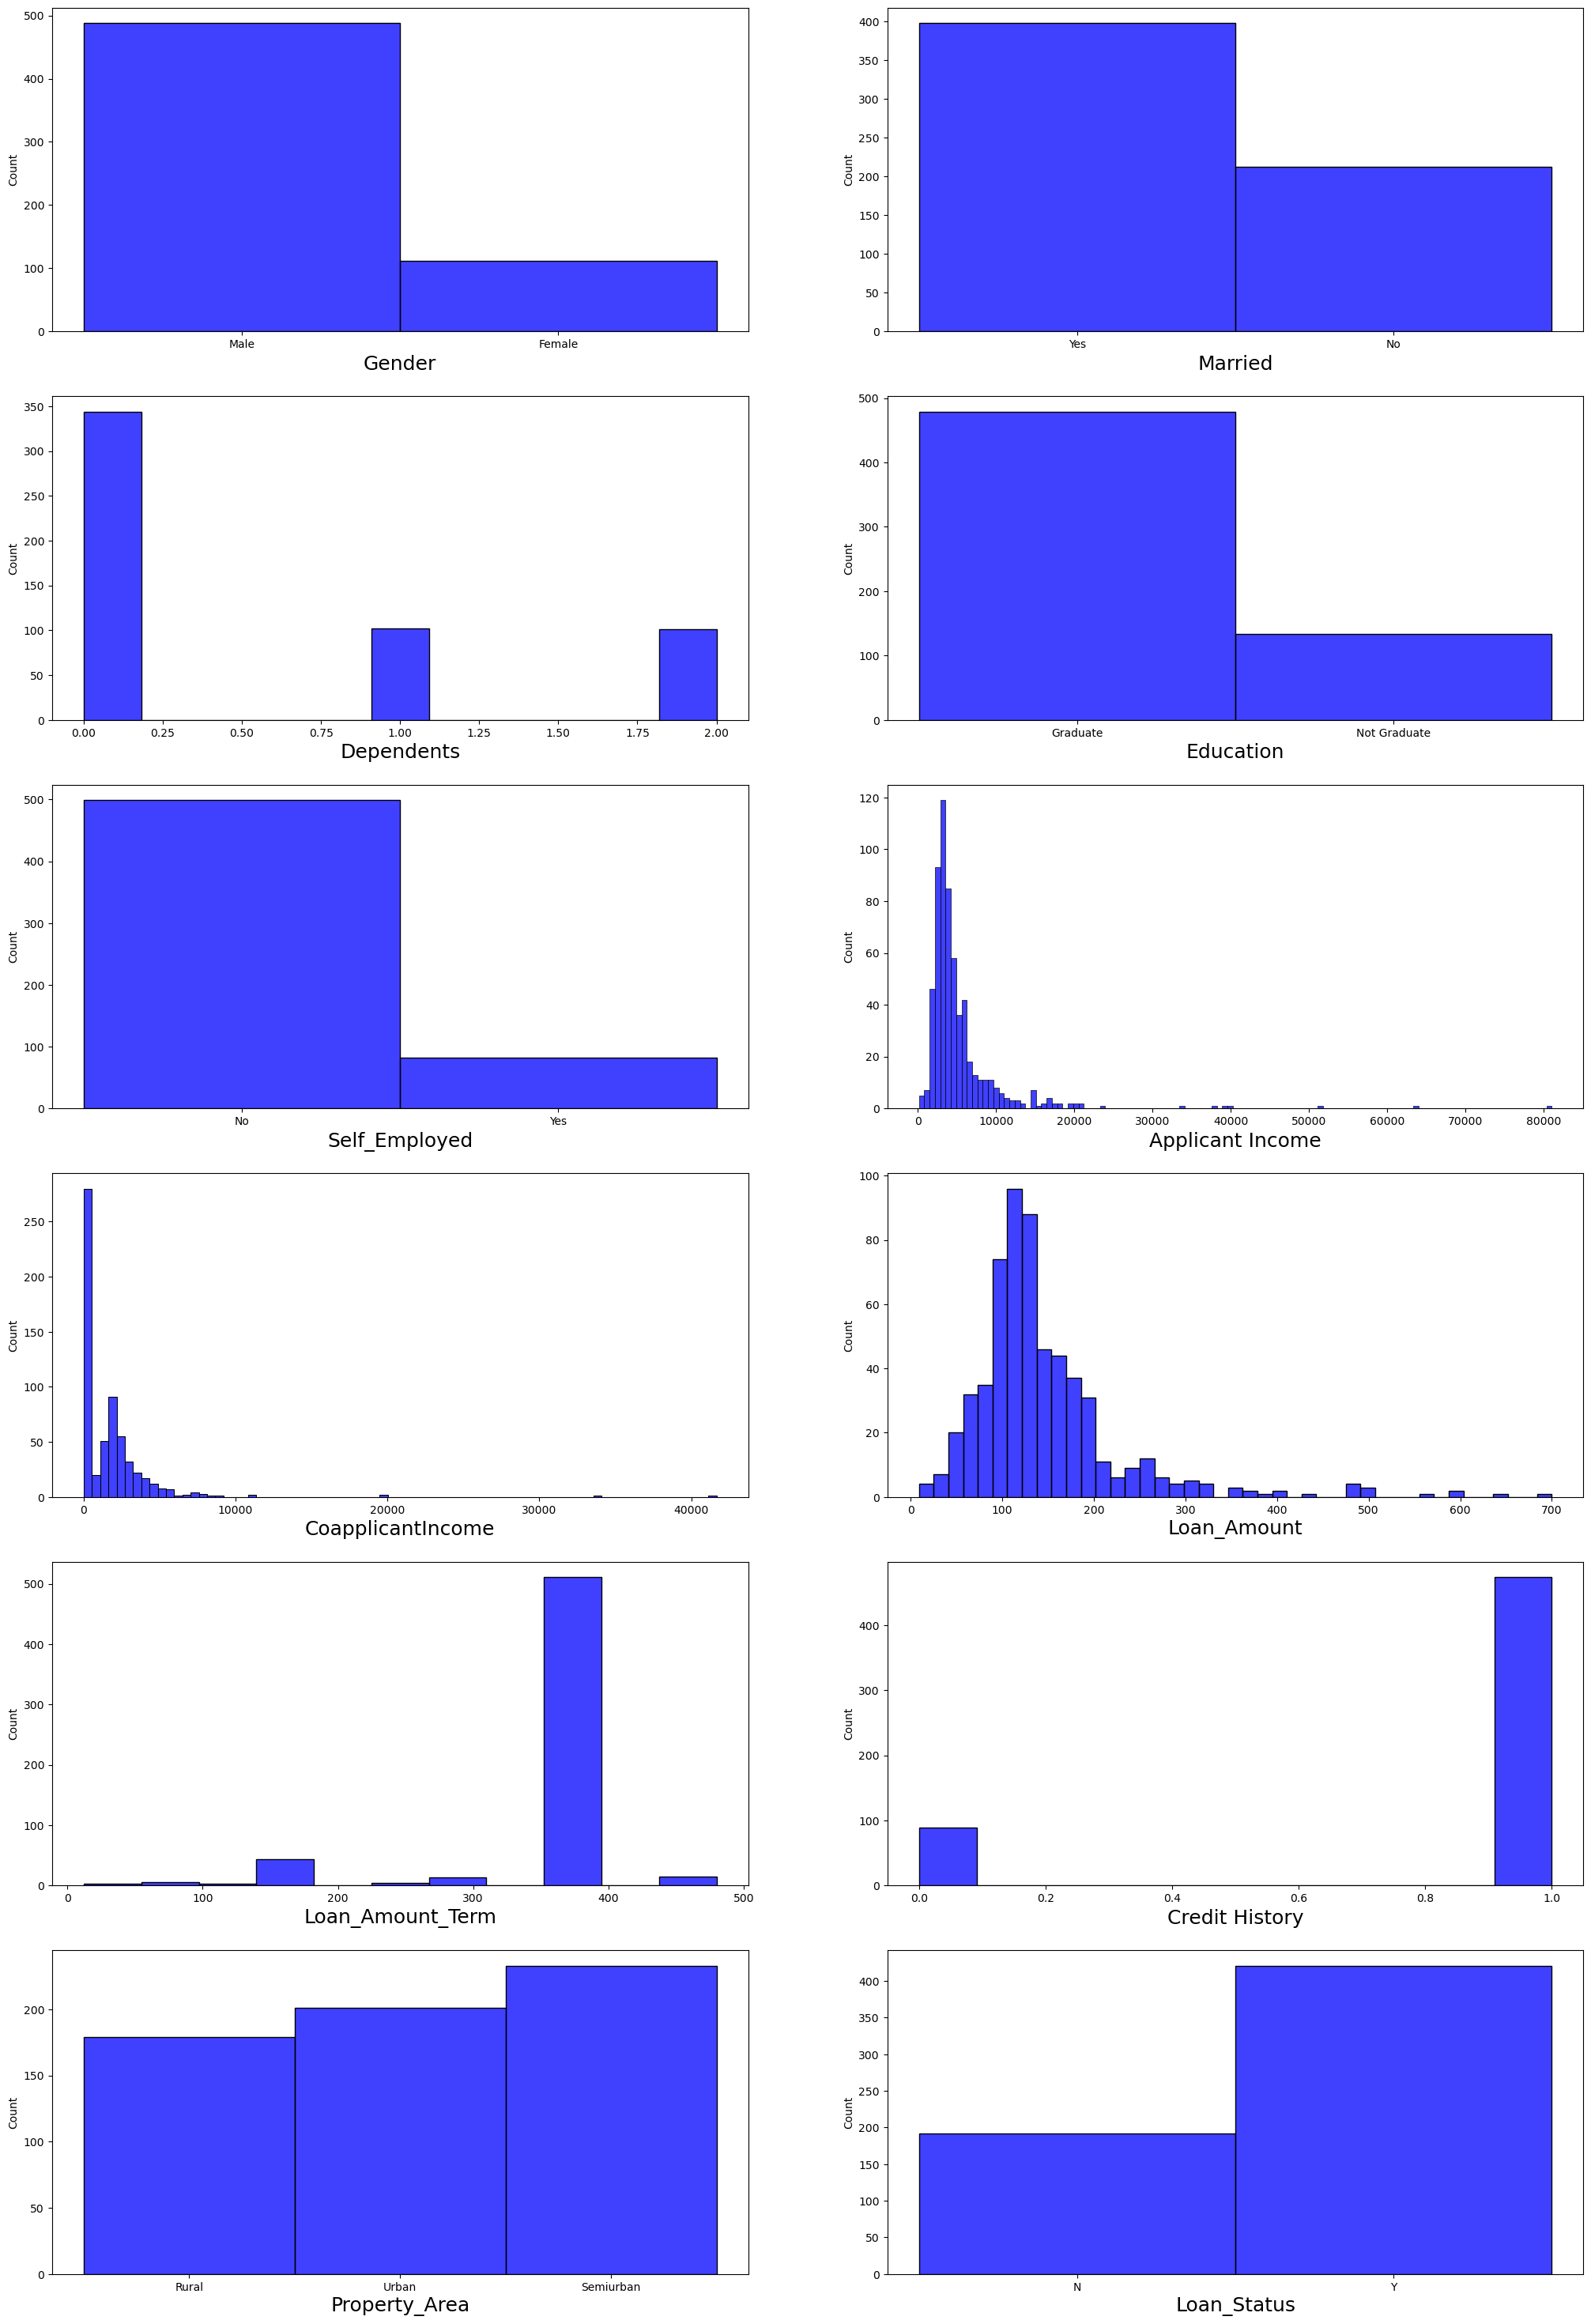

In [21]:
#Getting a graphical view of value counts for each column
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in df:
    if plotnumber <=14:
        ax = plt.subplot(8,2,plotnumber)
        sns.histplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.show()

In [22]:
#Checking for null or missing values in the dataset
df.isnull().sum()# no null values

Gender               13
Married               3
Dependents           66
Education             0
Self_Employed        32
Applicant Income      0
CoapplicantIncome     0
Loan_Amount          21
Loan_Amount_Term     14
Credit History       50
Property_Area         0
Loan_Status           0
dtype: int64

<Axes: >

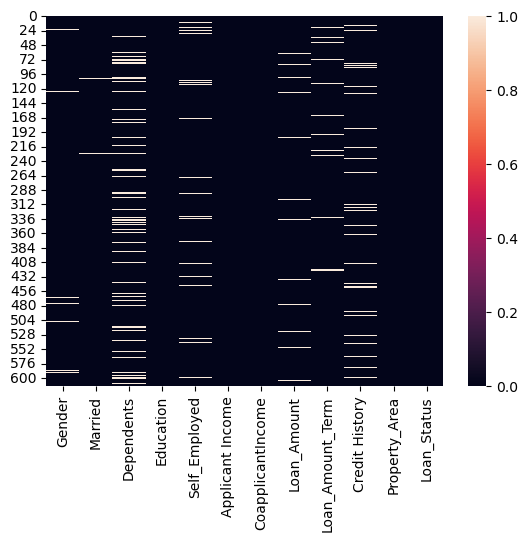

In [23]:
#visualize null using a heatmap
sns.heatmap(df.isnull())

In [24]:
# filling null values with mean in numerical columns
df[['Loan_Amount', 'Loan_Amount_Term','Credit History','Dependents']] = df[['Loan_Amount', 'Loan_Amount_Term','Credit History','Dependents']].fillna(df[['Loan_Amount', 'Loan_Amount_Term','Credit History','Dependents']].mean())

In [25]:
#Fill the null values for  object data
df["Gender"].fillna( method ='ffill', inplace = True)

In [26]:
df["Married"].fillna( method ='ffill', inplace = True)

In [27]:
df["Self_Employed"].fillna( method ='ffill', inplace = True)

In [28]:
#Checking for null again
df.isnull().sum()# no null values

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
Applicant Income     0
CoapplicantIncome    0
Loan_Amount          0
Loan_Amount_Term     0
Credit History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [29]:
#Checking information about the dataset again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             613 non-null    object 
 1   Married            613 non-null    object 
 2   Dependents         613 non-null    float64
 3   Education          613 non-null    object 
 4   Self_Employed      613 non-null    object 
 5   Applicant Income   613 non-null    int64  
 6   CoapplicantIncome  613 non-null    float64
 7   Loan_Amount        613 non-null    float64
 8   Loan_Amount_Term   613 non-null    float64
 9   Credit History     613 non-null    float64
 10  Property_Area      613 non-null    object 
 11  Loan_Status        613 non-null    object 
dtypes: float64(5), int64(1), object(6)
memory usage: 57.6+ KB


<Axes: >

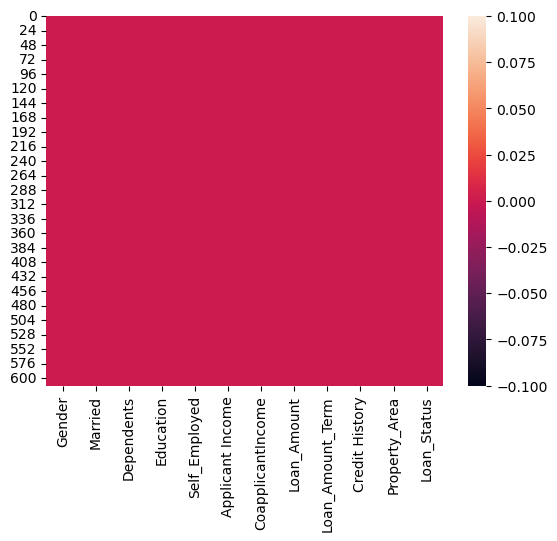

In [30]:
#checking null values using the heatmap
sns.heatmap(df.isnull())

In [31]:
#Statistical summary of numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Dependents,613.0,0.555759,0.742115,0.0,0.0,0.0,1.0,2.0
Applicant Income,613.0,5402.732463,6114.004114,150.0,2876.0,3812.0,5780.0,81000.0
CoapplicantIncome,613.0,1623.890571,2927.903583,0.0,0.0,1210.0,2302.0,41667.0
Loan_Amount,613.0,146.412162,84.106098,9.0,100.0,129.0,165.0,700.0
Loan_Amount_Term,613.0,341.969950,64.420943,12.0,360.0,360.0,360.0,480.0
Credit History,613.0,0.841918,0.349908,0.0,1.0,1.0,1.0,1.0


In [ ]:
General view
#from the statistical description above the count of all columns are similar (613.0) therefore no missing data values

#the absence of negative values shows that the data is of good quality

#in all columns but Credit History and Loan amount term mean value  is greater than the median(second percentile).
The data is skewed to the right.This will be dealt with later.

#In all columns  but credit history there are huge differences between the third percentile and max values which signify the existance of outliers in the data. 


Column specific statistical view

Dependents: The average number of dependents per allpicant is 0.55 with a minimum of 0.00 and a maximum of 2.The standard
             deviation of 0.74 shows small variability in the dependents column

Applicant Income: The average value is 5402.73 ranging  from a minimum of 150 to  maximum of 81000.
    
Coapplicant Income:The average value is 1623 ranging  from a minimum of 0 to  maximum of 41667.

Loan_Amount: The average loan is 146.41 . The minimum values is 9 and up to a maximum value of 700.
    
Loan_Amount_Terms- the mean value is 341.96,minimum term is 12 months and maximum value of 480 days.

Credit History-is either 0 or 1

In [32]:
#Summary of columns with categorical data
df.describe(include='object')

,Gender,Married,Education,Self_Employed,Property_Area,Loan_Status
count,613,613,613,613,613,613
unique,2,2,2,2,3,2
top,Male,Yes,Graduate,No,Semiurban,Y
freq,499,400,479,527,233,421


In [33]:
#Split between Categorical and Numerical columns

categorical = ['Gender', 'Married', 'Education','Self_Employed','Property_Area','Loan_Status']
numerical = ['Dependents', 'Applicant Income', 'CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit History']

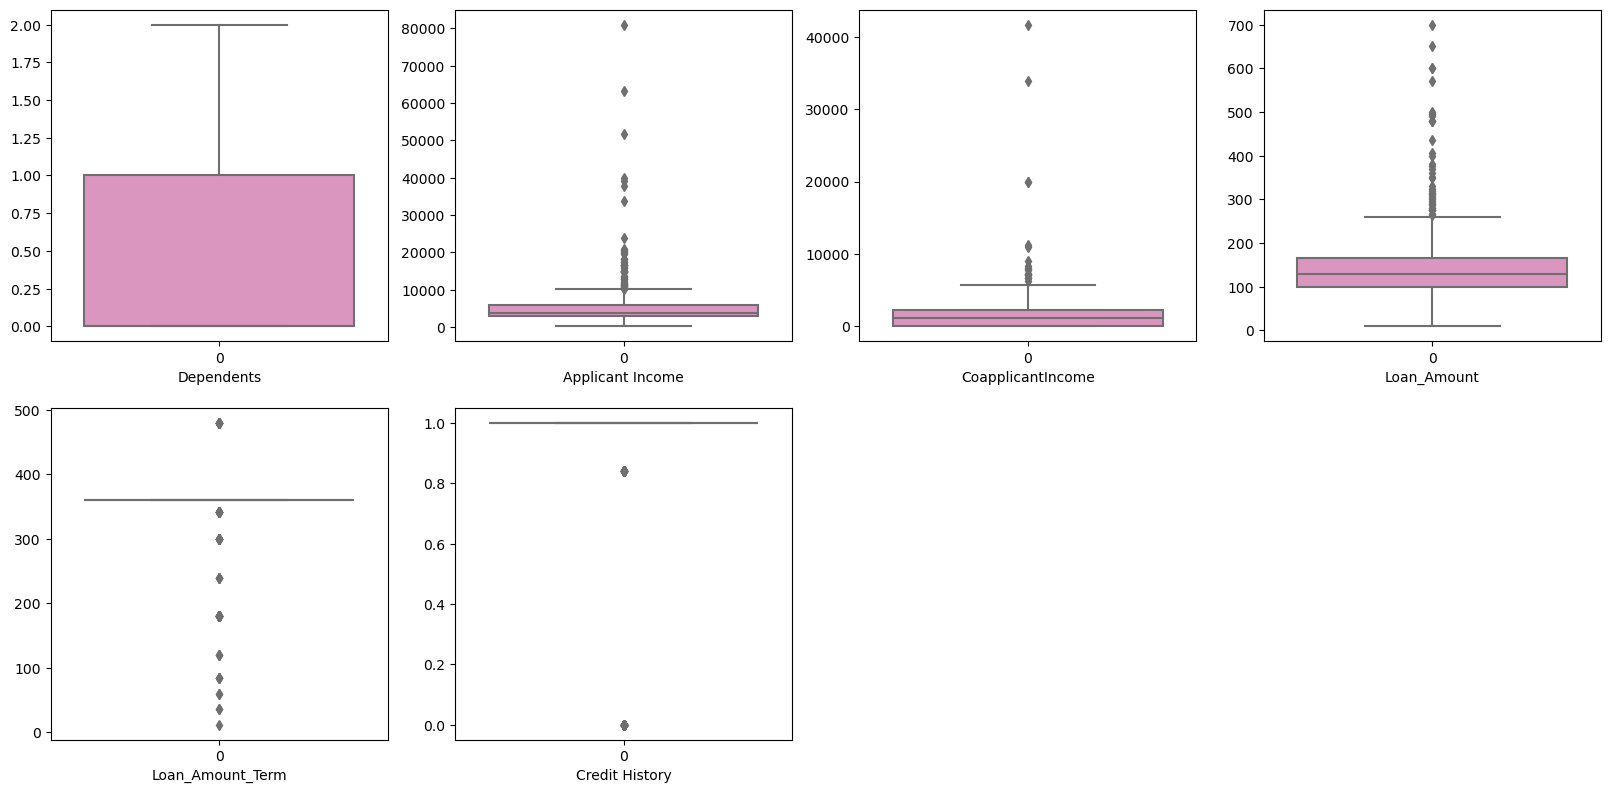

In [34]:
#Let's check data distribution and outliers using boxplot
#please note that this is for numerical columns only and its evident that there are outliers in all columns as mention in the statistial summary
#I only considered only numerical columns
#Outliers will be dealt with later
plt.figure(figsize=(20,25))
p=1
for column in numerical:
    if p<=6:
        plt.subplot(5,4,p)
        sns.boxplot(df[column], palette ="Set2_r")
        plt.xlabel(column)
        
    p+=1
    
plt.show()

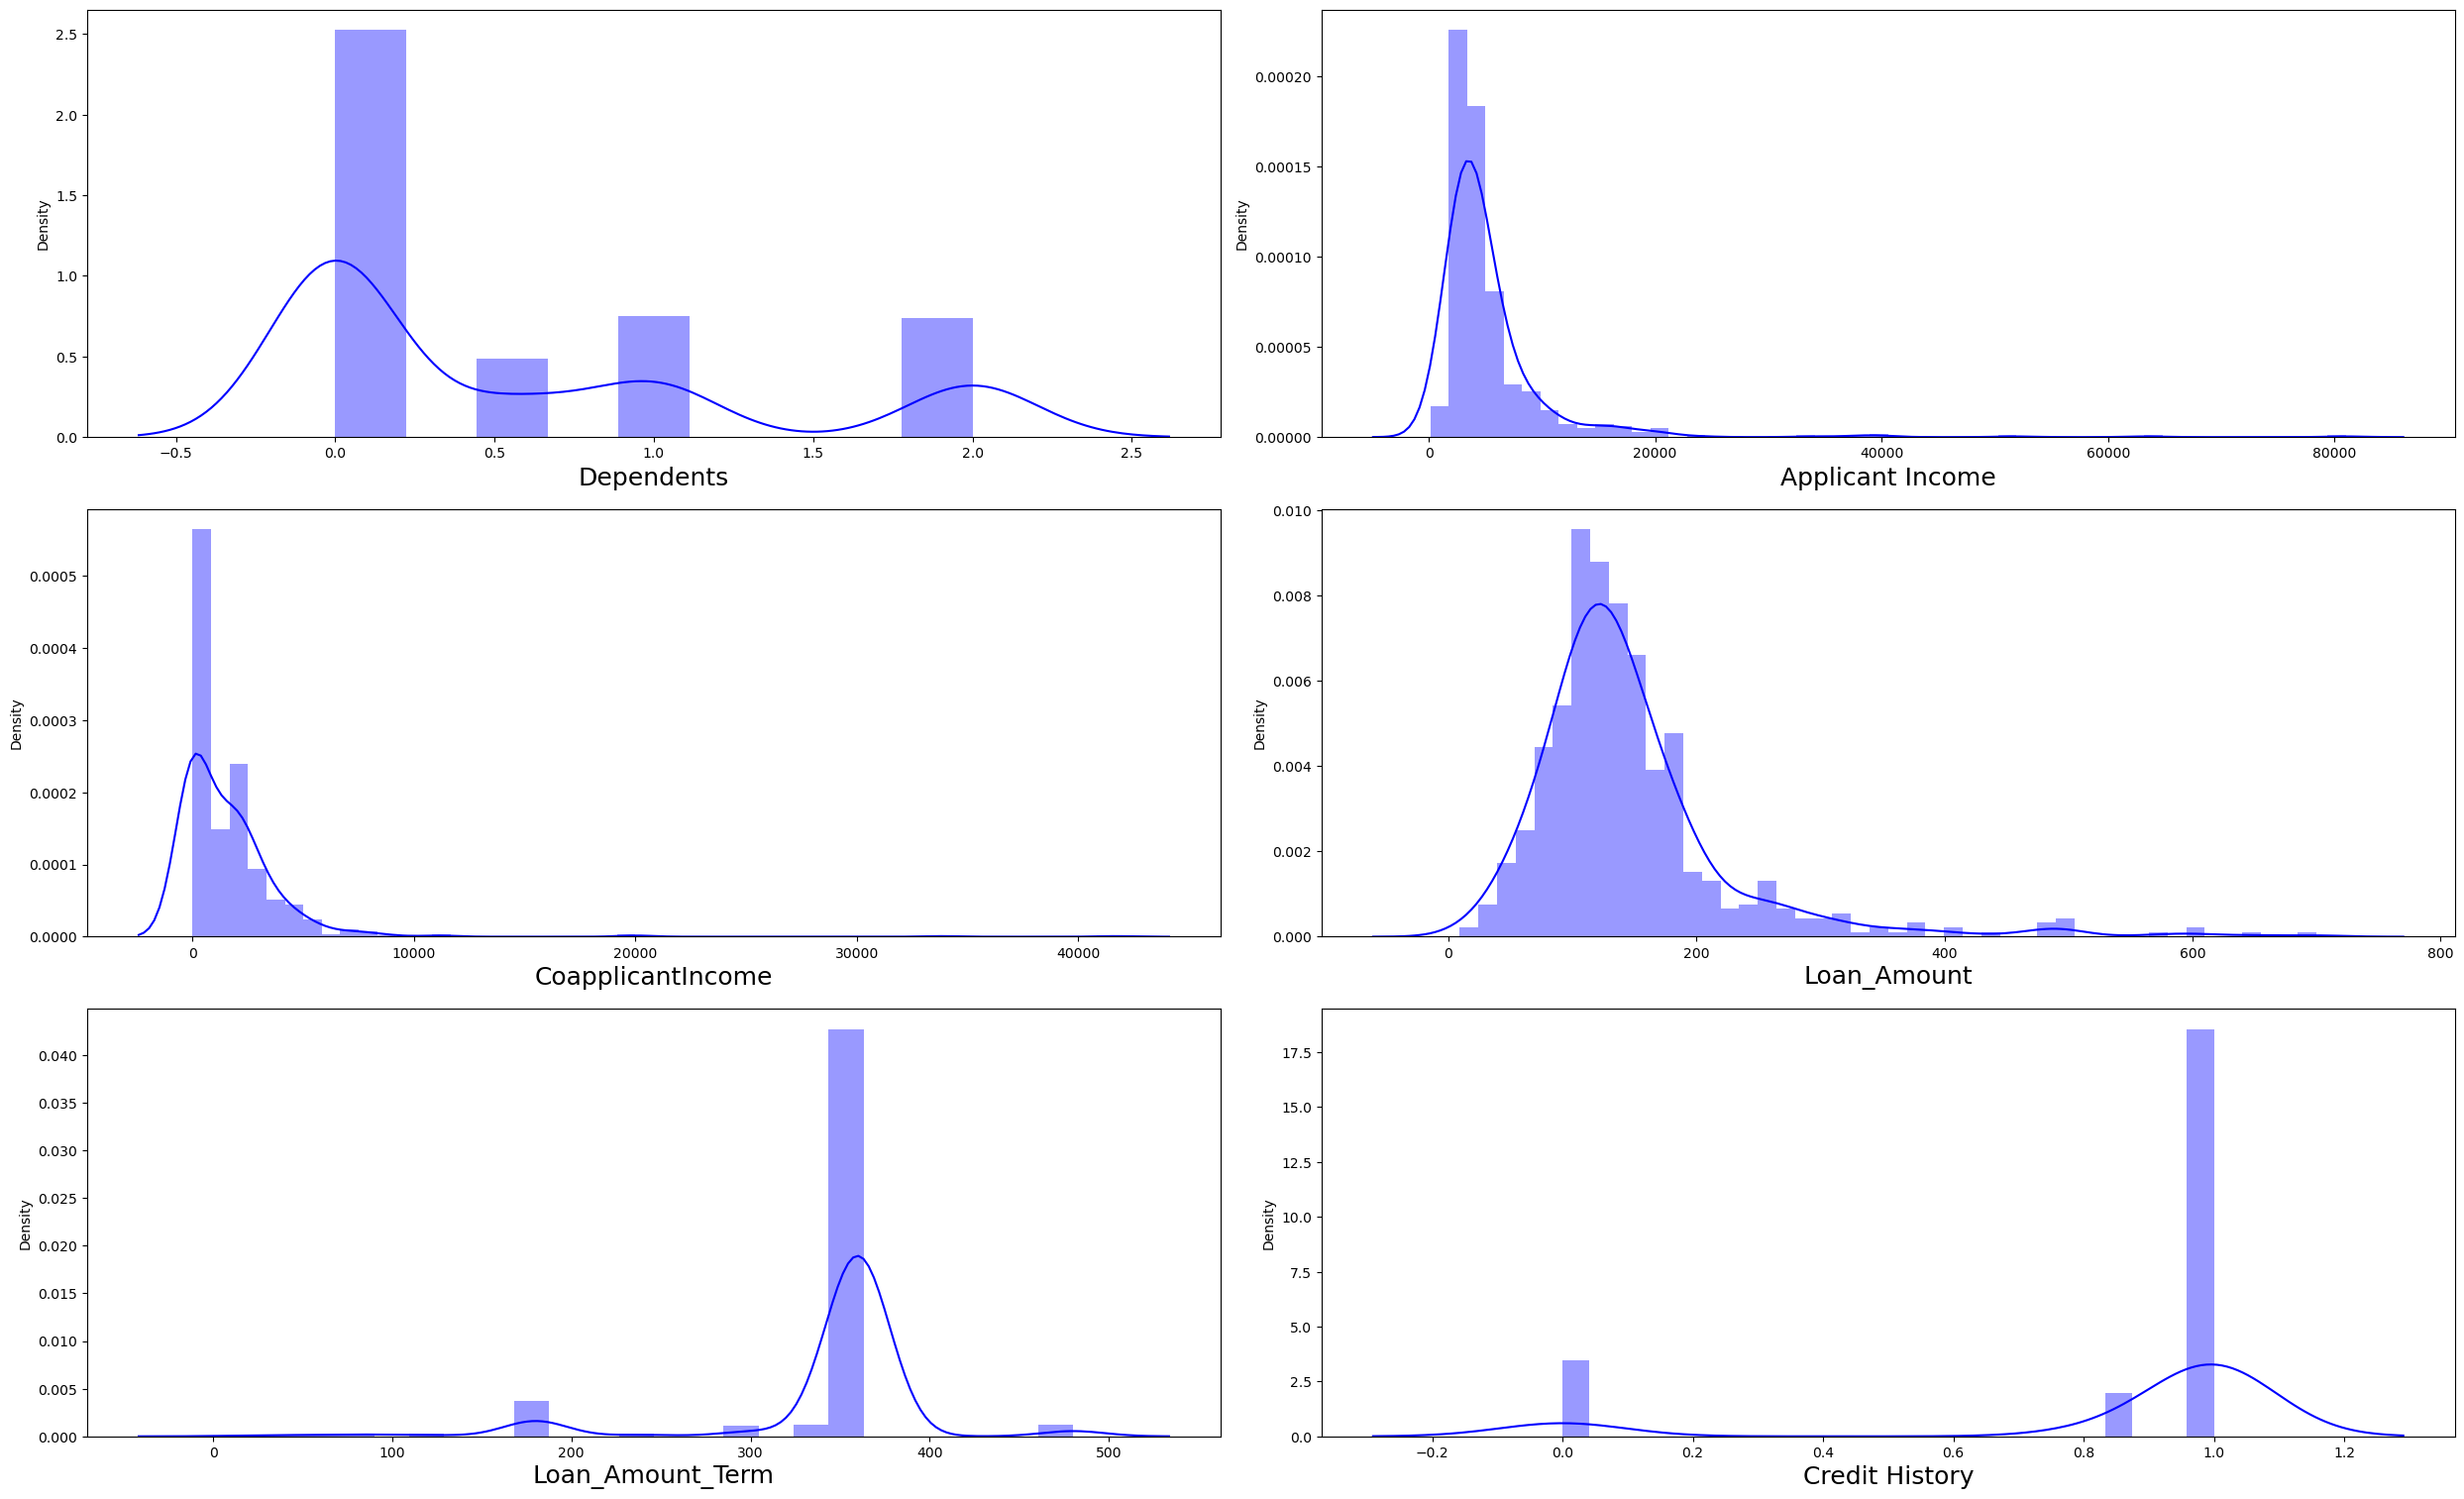

In [35]:
#Checking the distribution of data using distribution plot
#This is for numerical columns only
#the columns show skeweness as highlighted earlier
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=6:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
608    Female
609      Male
610      Male
611      Male
612    Female
Name: Gender, Length: 613, dtype: object


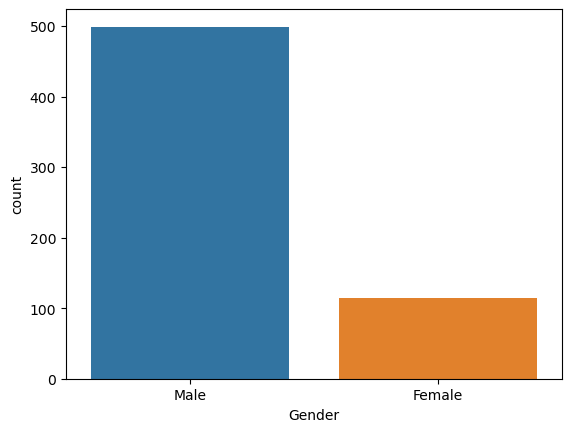

In [36]:
#Data Visualizaton -Univariate Analysis
#Visualize the  categorical data
#Visualize Gender
ax=sns.countplot(x='Gender',data=df)
print(df['Gender'])

0      Yes
1      Yes
2      Yes
3       No
4      Yes
      ... 
608     No
609    Yes
610    Yes
611    Yes
612     No
Name: Married, Length: 613, dtype: object


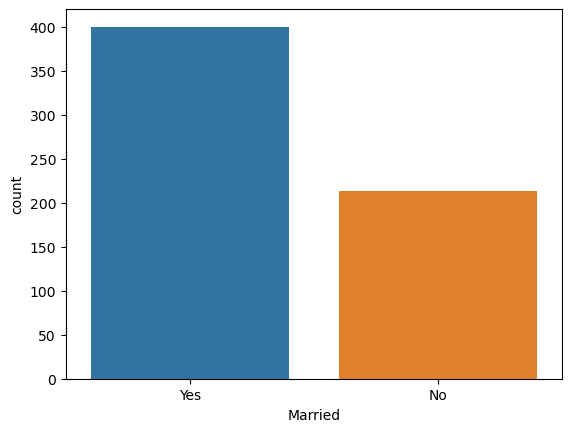

In [37]:
#Visualize Married
ax=sns.countplot(x='Married',data=df)
print(df['Married'])

0          Graduate
1          Graduate
2      Not Graduate
3          Graduate
4          Graduate
           ...     
608        Graduate
609        Graduate
610        Graduate
611        Graduate
612        Graduate
Name: Education, Length: 613, dtype: object


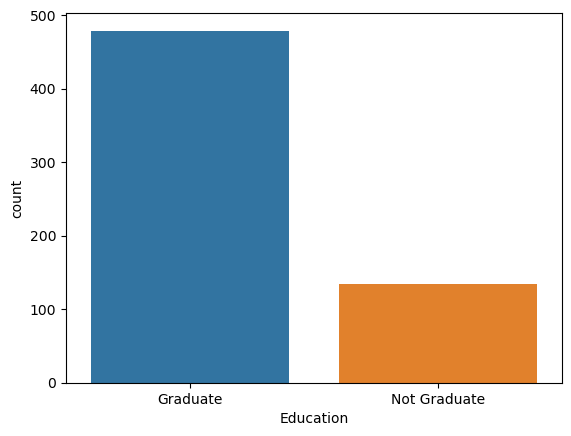

In [38]:
#Visualize Education
ax=sns.countplot(x='Education',data=df)
print(df['Education'])

0       No
1      Yes
2       No
3       No
4      Yes
      ... 
608     No
609     No
610     No
611     No
612    Yes
Name: Self_Employed, Length: 613, dtype: object


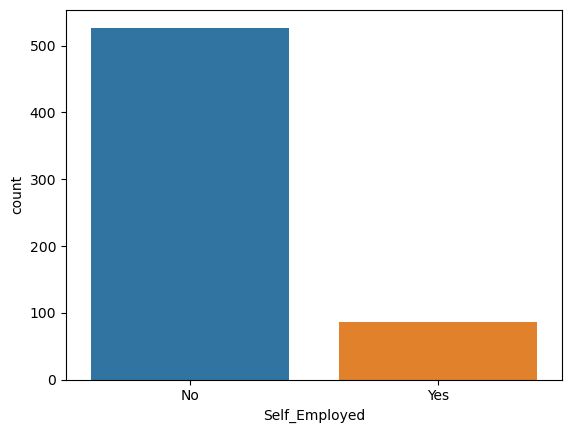

In [39]:
#Visualize Self_Employed
ax=sns.countplot(x='Self_Employed',data=df)
print(df['Self_Employed'])

0          Rural
1          Urban
2          Urban
3          Urban
4          Urban
         ...    
608        Rural
609        Rural
610        Urban
611        Urban
612    Semiurban
Name: Property_Area, Length: 613, dtype: object


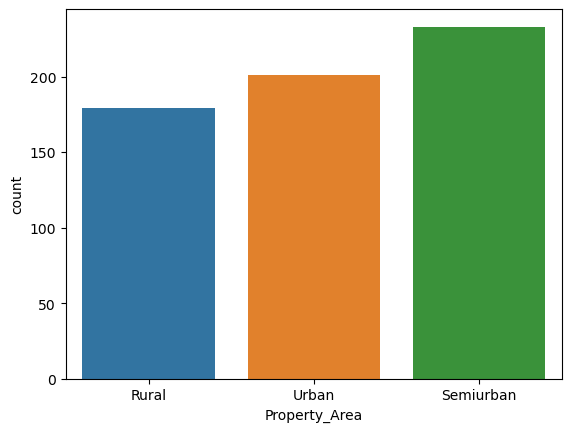

In [40]:
#Visualize Property_Area
ax=sns.countplot(x='Property_Area',data=df)
print(df['Property_Area'])

0      N
1      Y
2      Y
3      Y
4      Y
      ..
608    Y
609    Y
610    Y
611    Y
612    N
Name: Loan_Status, Length: 613, dtype: object


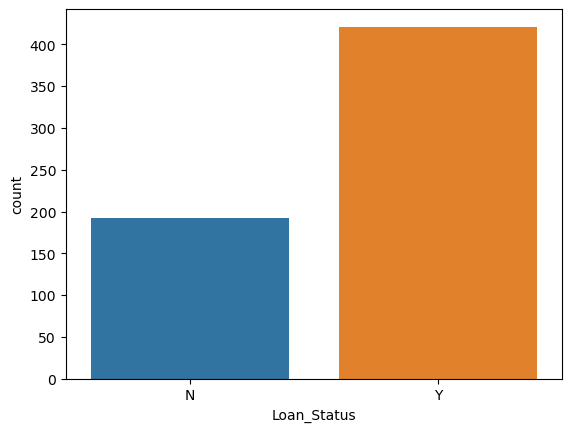

In [41]:
#Visualize Loan_Status
ax=sns.countplot(x='Loan_Status',data=df)
print(df['Loan_Status'])

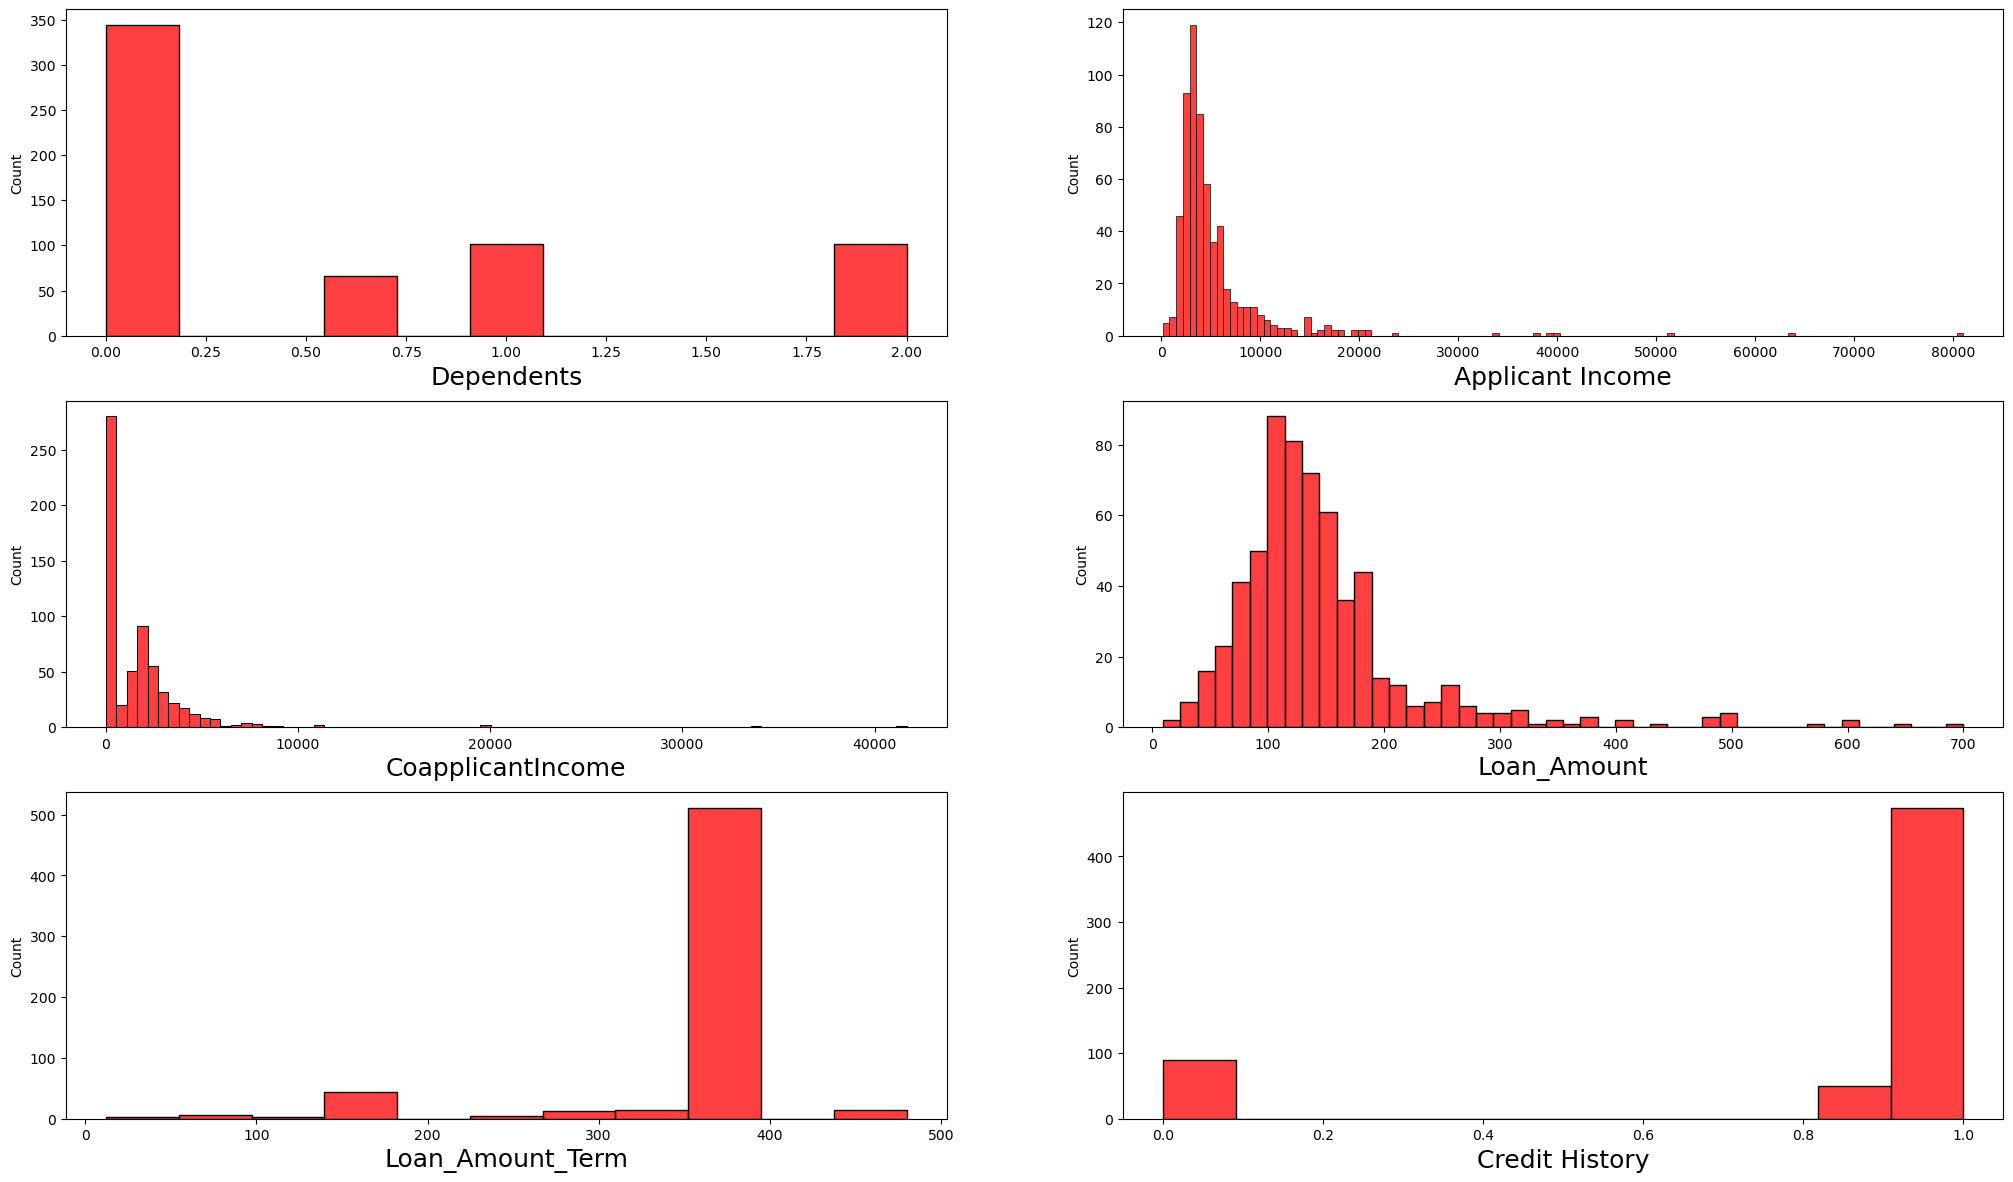

In [42]:
#Univariate analysis for numerical columns
#Visualize  using histplot
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=6:
        ax = plt.subplot(10,2,plotnumber)
        sns.histplot(df[column], color = 'red')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.show()

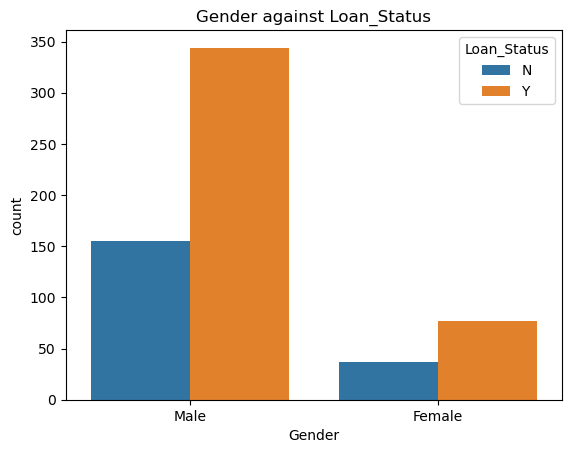

In [43]:
#Bivariate analysis of target variable versus categorical columns
ax= sns.countplot(x='Gender', hue='Loan_Status',data=df)
plt.title("Gender against Loan_Status")
plt.show()#male customers have a better approval rate than female

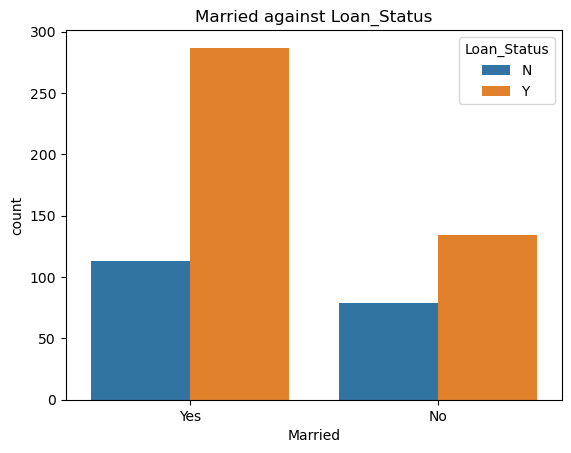

In [44]:
ax= sns.countplot(x='Married', hue='Loan_Status',data=df)
plt.title("Married against Loan_Status")
plt.show()#married clients have a better aproval rate than unmarried

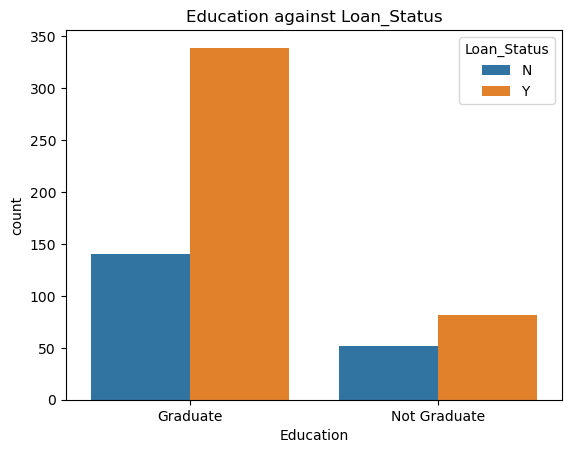

In [45]:
ax= sns.countplot(x='Education', hue='Loan_Status',data=df)
plt.title("Education against Loan_Status")
plt.show()#graduate have a better loan approval rate than no graduates

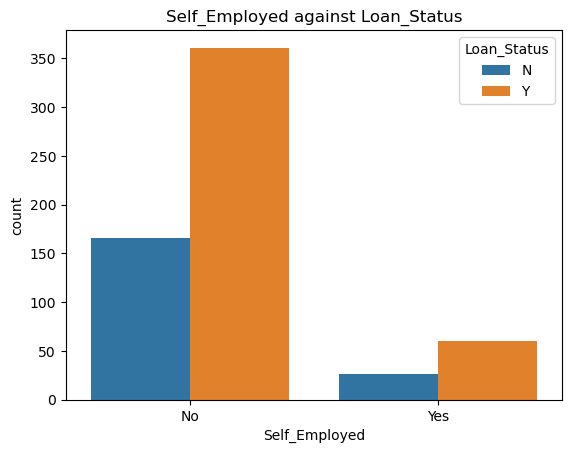

In [46]:
ax= sns.countplot(x='Self_Employed', hue='Loan_Status',data=df)
plt.title("Self_Employed against Loan_Status")
plt.show()#self employed clients have a better approval rate ompare to those not

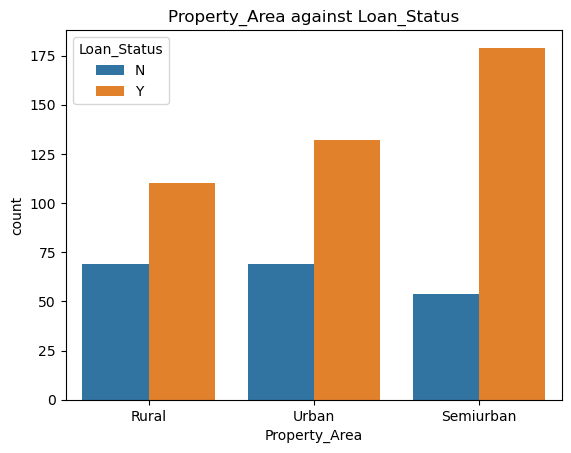

In [47]:
ax= sns.countplot(x='Property_Area', hue='Loan_Status',data=df)
plt.title("Property_Area against Loan_Status")
plt.show()#clents who reside in semi urban property area have a better loan approval rate

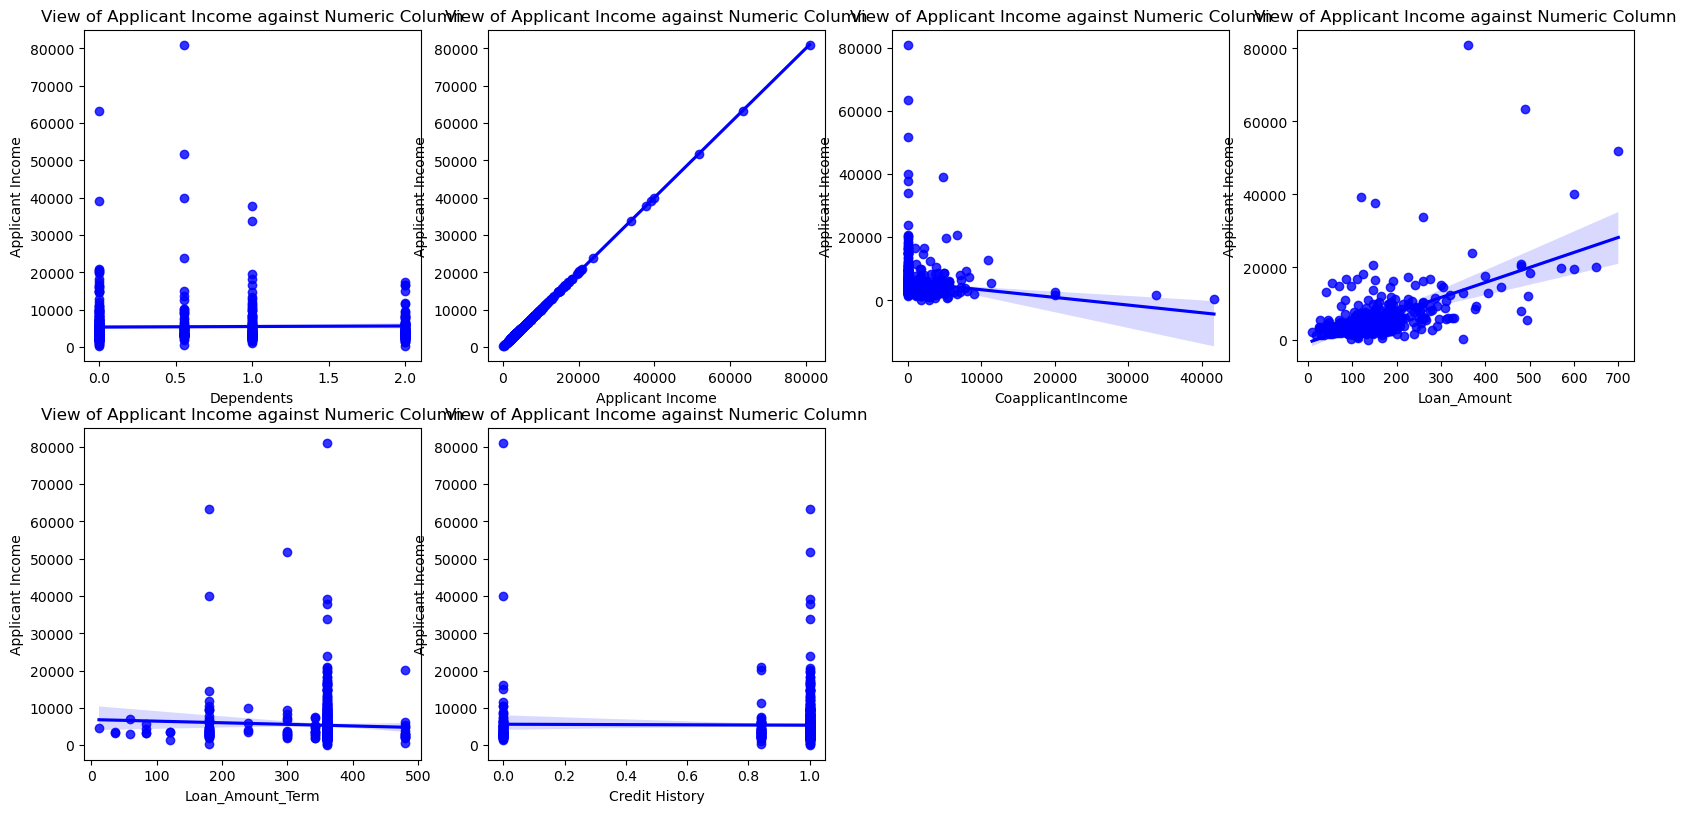

In [48]:
#Bivariate analysis of Average price versus numerical columns

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for column in numerical:
    if p<=12:
        plt.subplot(5,4,p)
        sns.regplot(x=df[column],y='Applicant Income',data=df,color='blue')
        plt.title("View of Applicant Income against Numeric Column")
      
    p+= 1
plt.show()
#there is no relationship between Applicant income and Dependents
#there is a negative relatinship between Applicant Income,CoapplicantIncome,Loan_Amount_Term and credit history
#positive relationship between Loan amount and applicant income

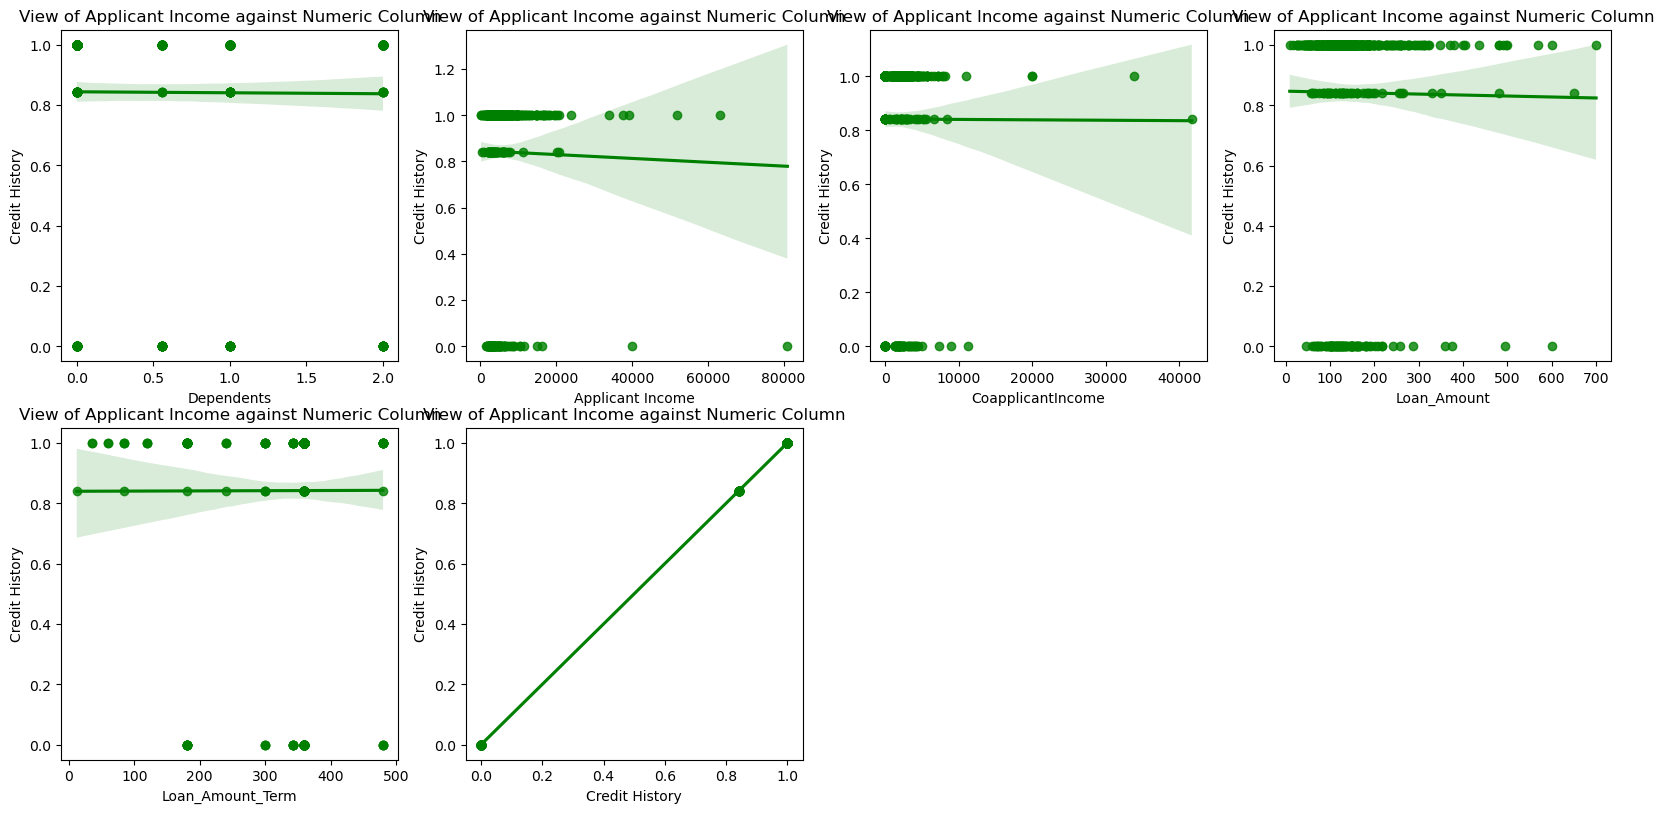

In [49]:

plt.figure(figsize = (20,25), facecolor = 'white')
p=1

for column in numerical:
    if p<=12:
        plt.subplot(5,4,p)
        sns.regplot(x=df[column],y='Credit History',data=df,color='green')
        plt.title("View of Applicant Income against Numeric Column")
      
    p+= 1
plt.show()

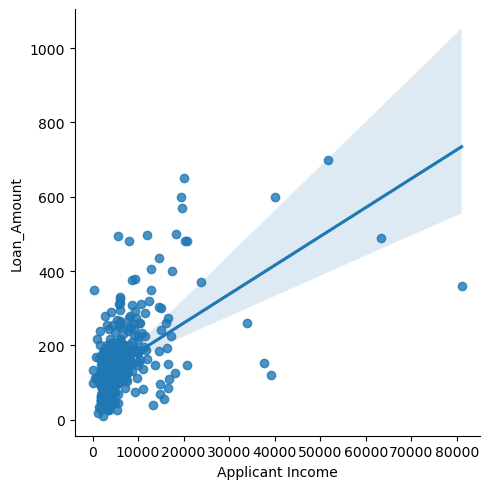

In [50]:
#visualize Applicant income versus Loan amount
#positive relationship between Loan amount and applicant income
sns.lmplot(x='Applicant Income',y='Loan_Amount',data=df,palette='colorblind')

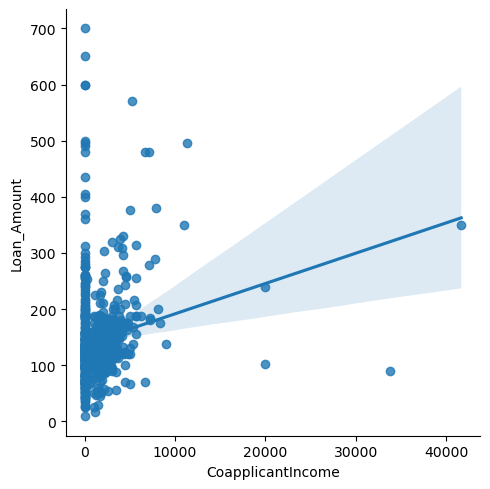

In [51]:
#visualize Coapplicant income versus Loan amount
#positive relationship between Loan amount and coapplicant income
sns.lmplot(x='CoapplicantIncome',y='Loan_Amount',data=df,palette='colorblind')

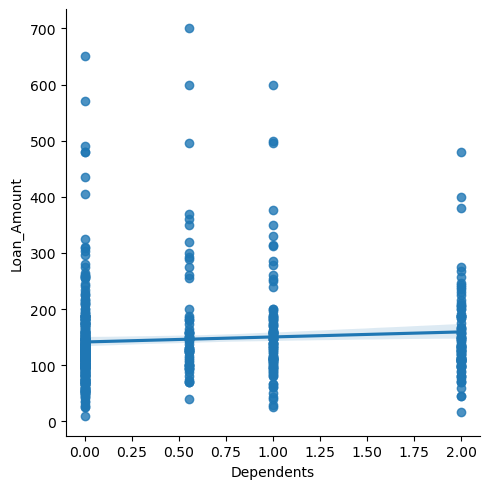

In [52]:
#visualize Dependants  versus Loan amount
#very weak positive relationship between dependents and Loan amount
sns.lmplot(x='Dependents',y='Loan_Amount',data=df,palette='colorblind')

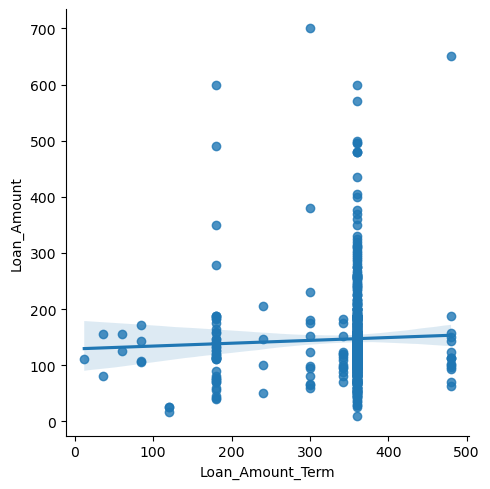

In [53]:
#visualize Loan_Amount_Term  versus Loan amount
#very weak positive relationship between Loan_Amount_Term and Loan amount
sns.lmplot(x='Loan_Amount_Term',y='Loan_Amount',data=df,palette='colorblind')

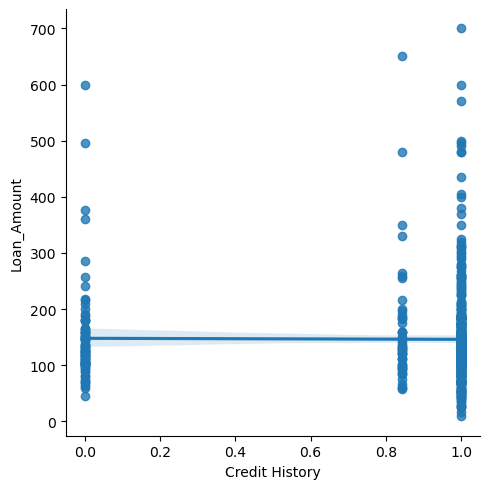

In [54]:
#visualize Credit History  versus Loan amount
#positive relationship between Credit History and Loan amount
sns.lmplot(x='Credit History',y='Loan_Amount',data=df,palette='colorblind')

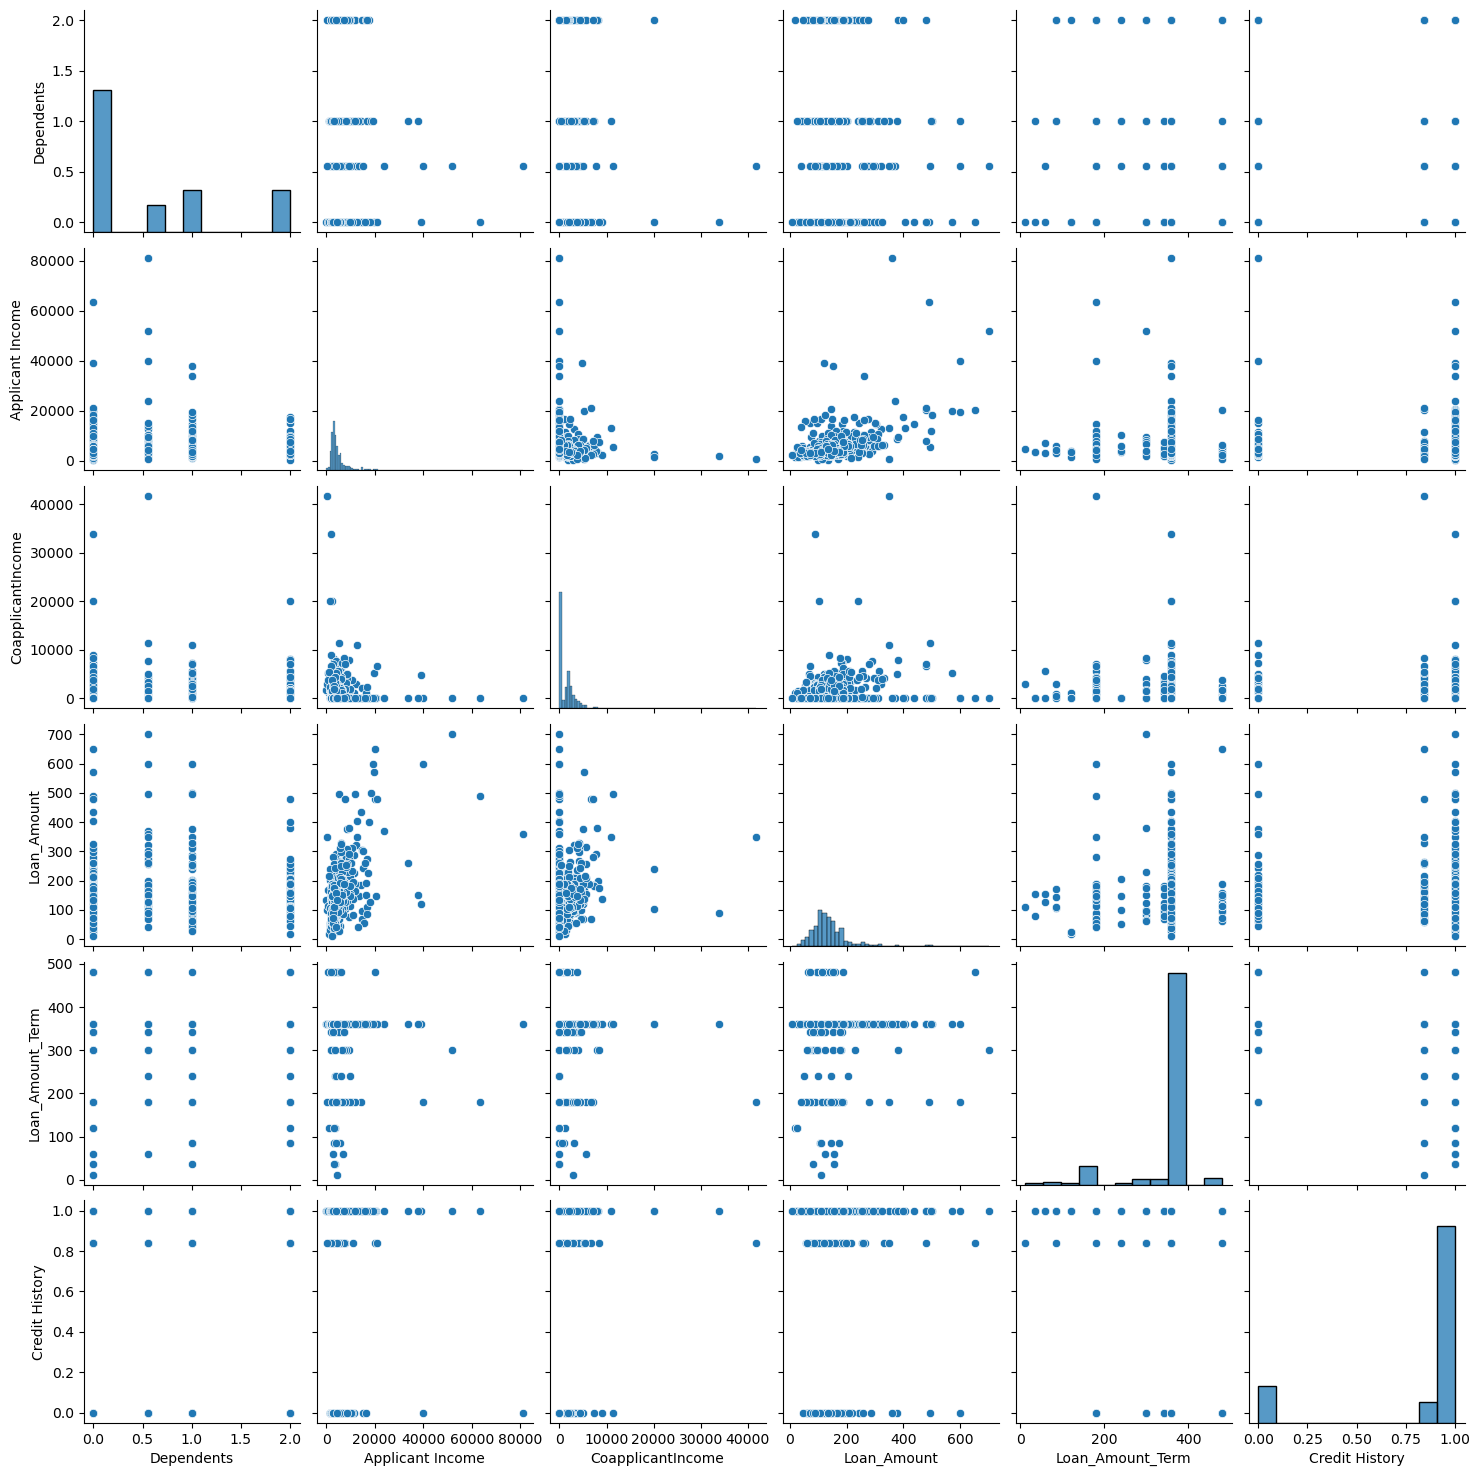

In [55]:
#Multivariate analysis
sns.pairplot(data =df,palette="Dark2")
plt.show()

<Axes: title={'center': 'Gender by year and Loan_Amount Price'}, xlabel='Gender', ylabel='Loan_Amount'>

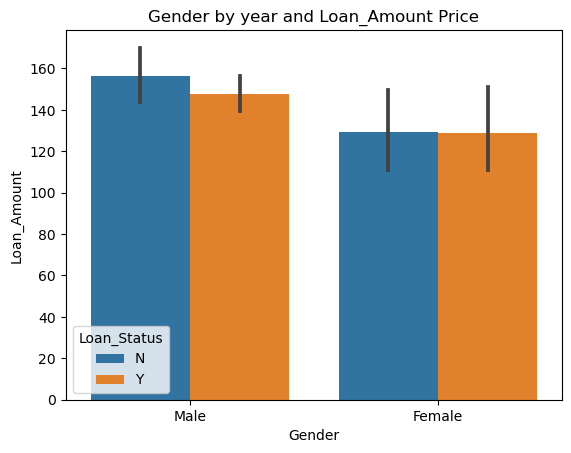

In [56]:
plt.title("Gender by year and Loan_Amount Price")
sns.barplot(x='Gender',y='Loan_Amount',hue='Loan_Status',data=df)

<Axes: title={'center': 'Married and Loan_Amount Price'}, xlabel='Married', ylabel='Loan_Amount'>

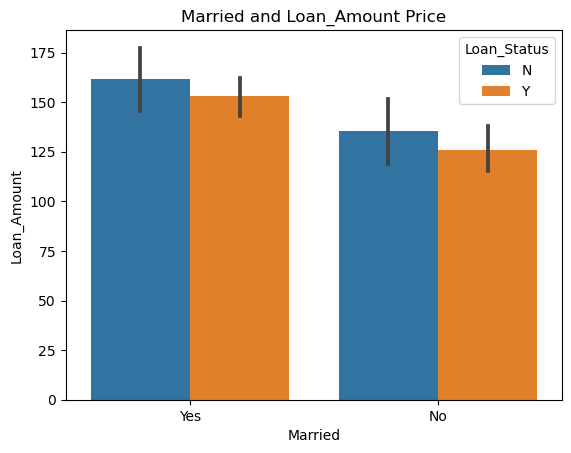

In [57]:
plt.title("Married and Loan_Amount Price")
sns.barplot(x='Married',y='Loan_Amount',hue='Loan_Status',data=df)

<Axes: title={'center': 'Education and Loan_Amount'}, xlabel='Education', ylabel='Loan_Amount'>

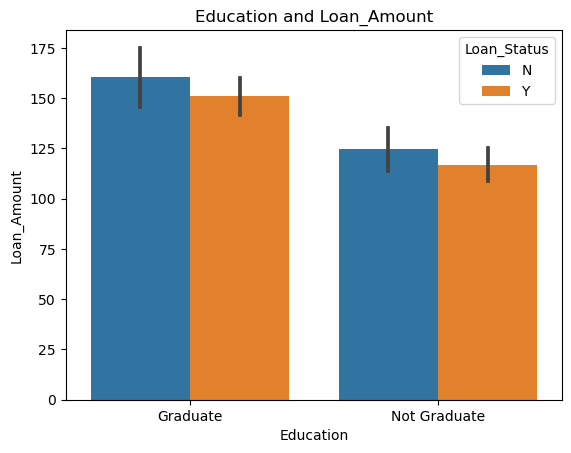

In [58]:
plt.title("Education and Loan_Amount")
sns.barplot(x='Education',y='Loan_Amount',hue='Loan_Status',data=df)

<Axes: title={'center': 'Self_Employed and Loan_Amount'}, xlabel='Self_Employed', ylabel='Loan_Amount'>

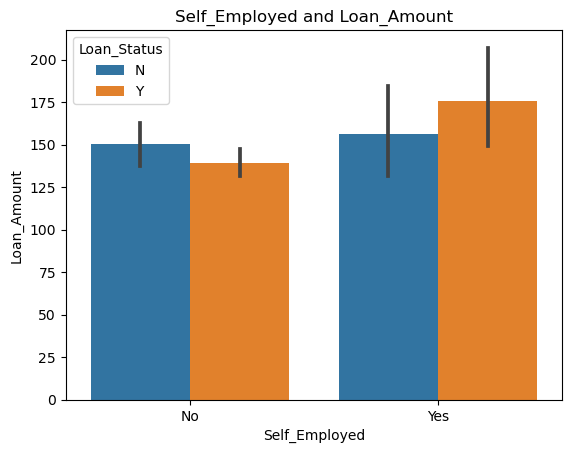

In [59]:
plt.title("Self_Employed and Loan_Amount")
sns.barplot(x='Self_Employed',y='Loan_Amount',hue='Loan_Status',data=df)

<Axes: title={'center': 'Education and Loan_Amount'}, xlabel='Education', ylabel='Loan_Amount'>

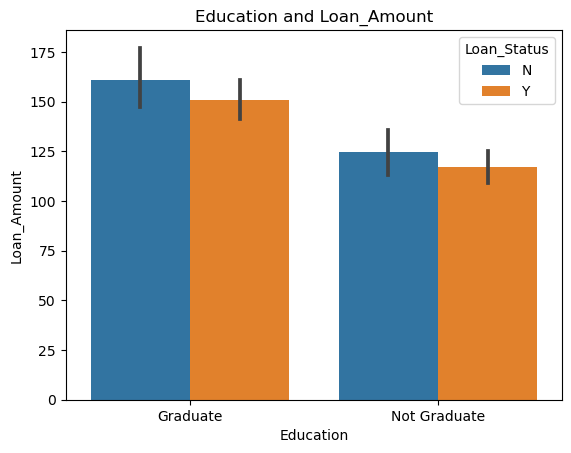

In [60]:
plt.title("Education and Loan_Amount")
sns.barplot(x='Education',y='Loan_Amount',hue='Loan_Status',data=df)

<Axes: title={'center': 'Property_Area and Loan_Amount'}, xlabel='Property_Area', ylabel='Loan_Amount'>

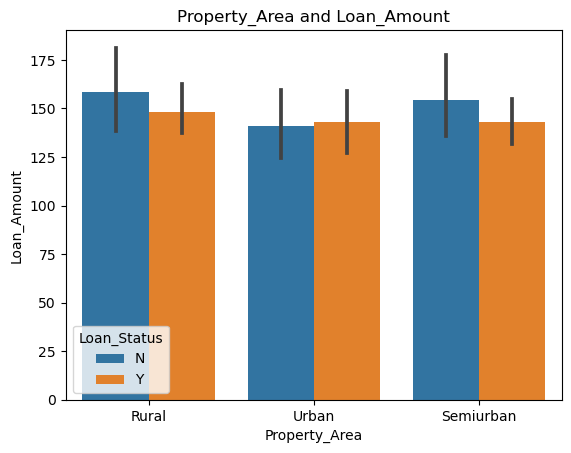

In [61]:
plt.title("Property_Area and Loan_Amount")
sns.barplot(x='Property_Area',y='Loan_Amount',hue='Loan_Status',data=df)

In [62]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

df['Gender'] = le.fit_transform(df['Gender'])

df['Married'] = le.fit_transform(df['Married'])

df['Education'] = le.fit_transform(df['Education'])

df['Self_Employed'] = le.fit_transform(df['Self_Employed'])

df['Property_Area'] = le.fit_transform(df['Property_Area'])

df['Loan_Status'] = le.fit_transform(df['Loan_Status'])




df.head()

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
0,1,1,1.0,0,0,4583,1508.0,128.0,360.0,1.0,0,0
1,1,1,0.0,0,1,3000,0.0,66.0,360.0,1.0,2,1
2,1,1,0.0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
3,1,0,0.0,0,0,6000,0.0,141.0,360.0,1.0,2,1
4,1,1,2.0,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [63]:
#Tabular view of Correlation
cor=df.corr()
cor

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area,Loan_Status
Gender,1.000000,0.373236,0.149648,0.049912,0.011994,0.046182,0.087461,0.098672,-0.075645,0.008605,-0.020836,0.011694
Married,0.373236,1.000000,0.335925,0.012941,-0.001159,0.049290,0.076659,0.147205,-0.094859,0.005309,0.007163,0.090749
Dependents,0.149648,0.335925,1.000000,0.027083,0.064656,0.017728,-0.000436,0.079192,-0.063433,-0.006886,0.055309,0.034947
Education,0.049912,0.012941,0.027083,1.000000,-0.009085,-0.140730,-0.062798,-0.167036,-0.077028,-0.077584,-0.064282,-0.085354
Self_Employed,0.011994,-0.001159,0.064656,-0.009085,1.000000,0.122793,-0.022181,0.111778,-0.027838,0.004439,-0.036350,0.009483
Applicant Income,0.046182,0.049290,0.017728,-0.140730,0.122793,1.000000,-0.116568,0.565623,-0.045276,-0.014525,-0.009657,-0.004792
CoapplicantIncome,0.087461,0.076659,-0.000436,-0.062798,-0.022181,-0.116568,1.000000,0.187876,-0.059441,-0.001279,0.011646,-0.058614
Loan_Amount,0.098672,0.147205,0.079192,-0.167036,0.111778,0.565623,0.187876,1.000000,0.038808,-0.007751,-0.044830,-0.036430
Loan_Amount_Term,-0.075645,-0.094859,-0.063433,-0.077028,-0.027838,-0.045276,-0.059441,0.038808,1.000000,0.001199,-0.078282,-0.021288
Credit History,0.008605,0.005309,-0.006886,-0.077584,0.004439,-0.014525,-0.001279,-0.007751,0.001199,1.000000,-0.002792,0.540269


<Axes: >

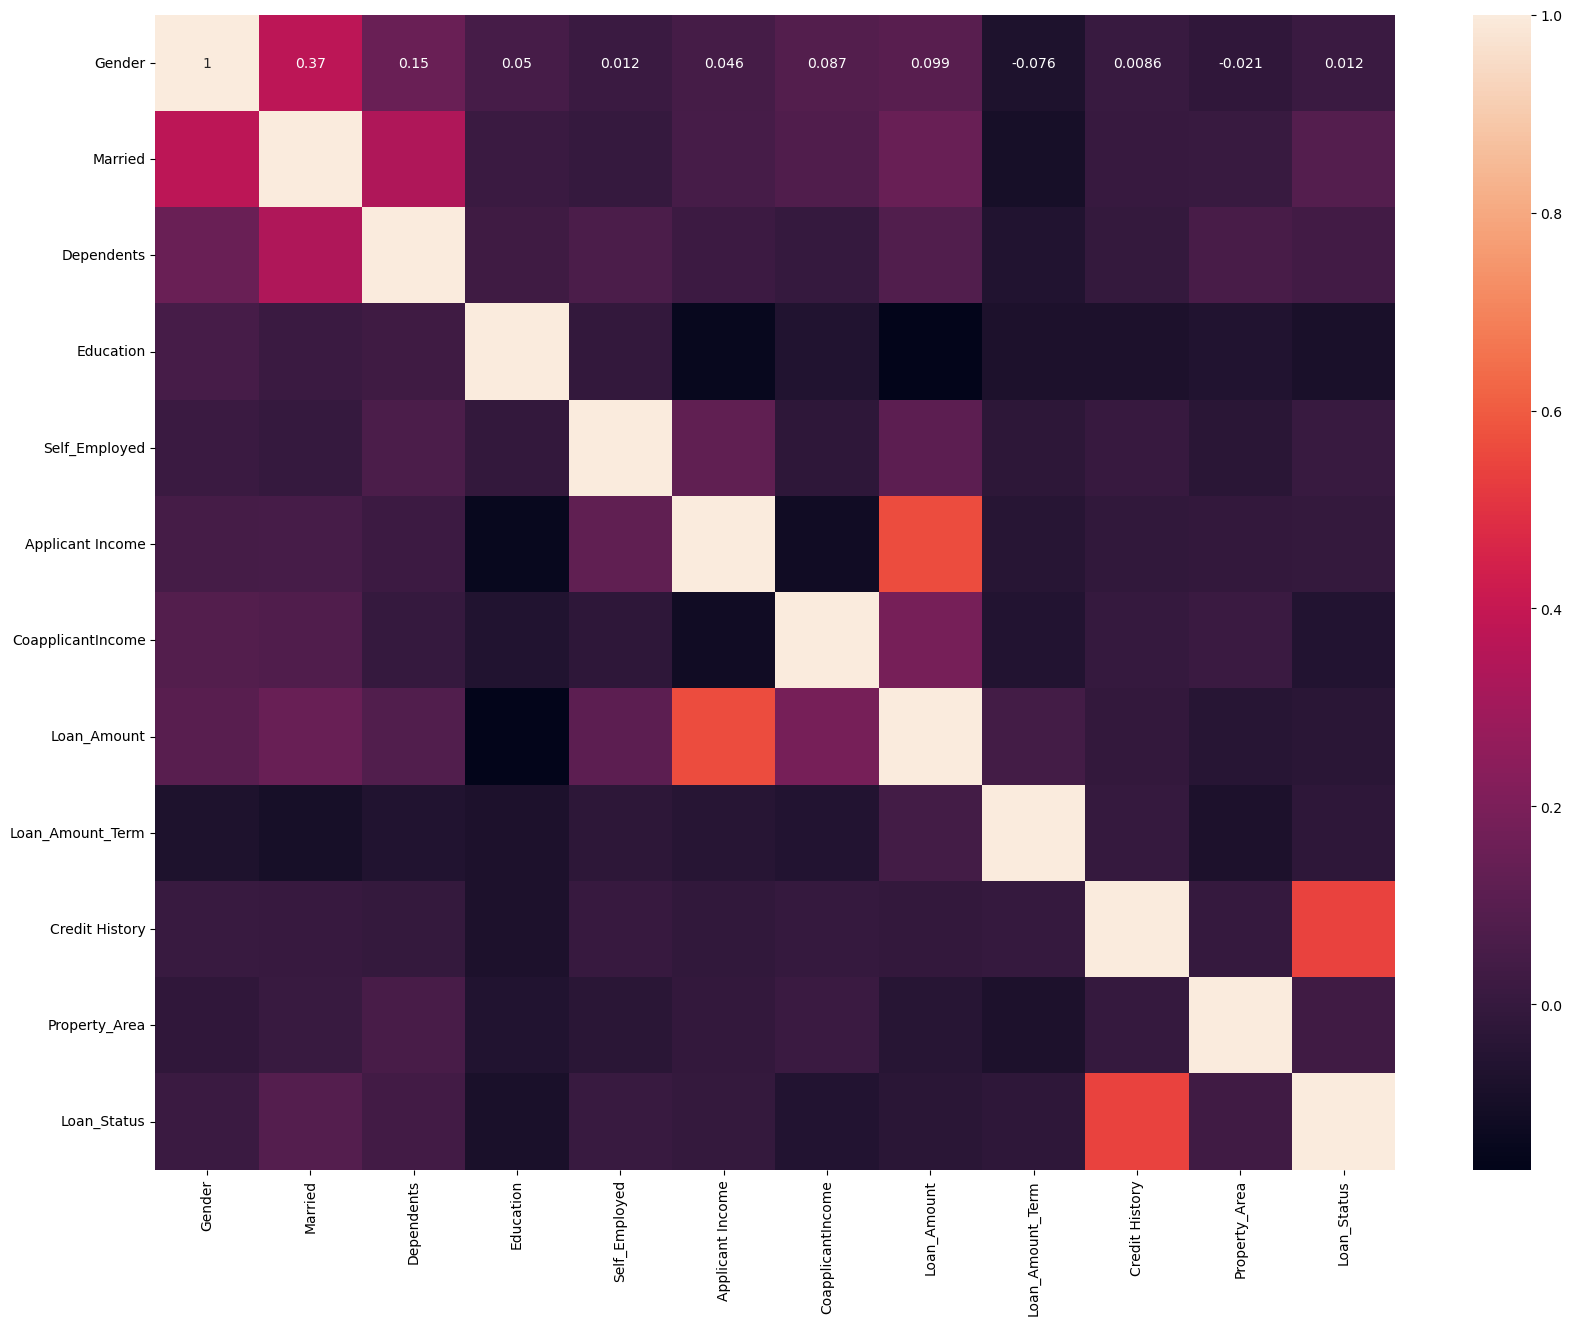

In [64]:
#Visualizing the correlation matrix by plotting heatmap.
f, ax = plt.subplots(figsize=(20, 15))
corr = df.corr()
sns.heatmap(df.corr(),annot=True)

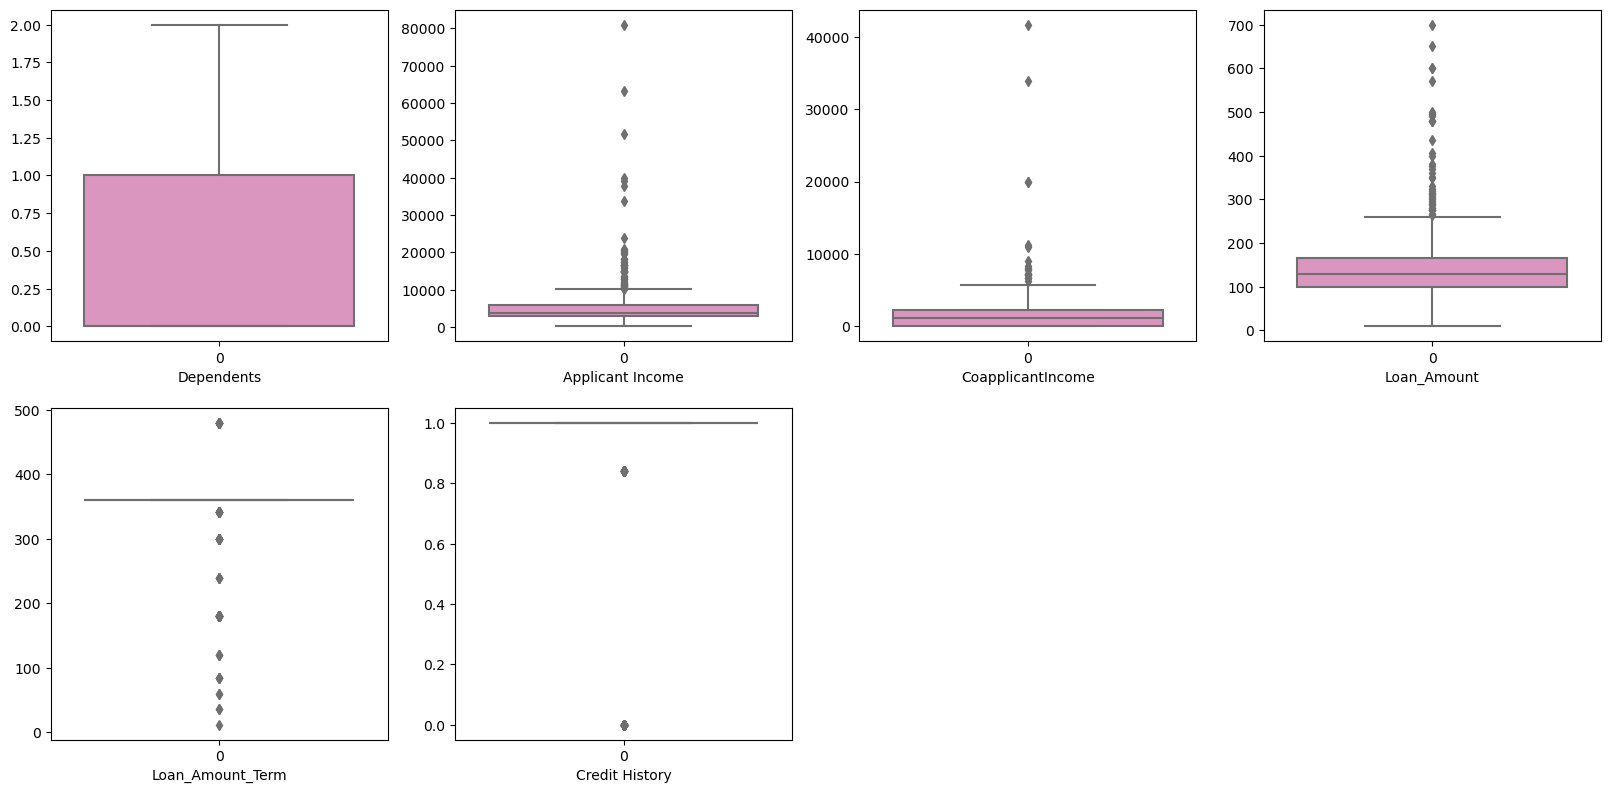

In [65]:
#Visualize Outliers
plt.figure(figsize=(20,25))
p=1
for column in numerical:
    if p<=6:
        plt.subplot(5,4,p)
        sns.boxplot(df[column], palette ="Set2_r")
        plt.xlabel(column)
        
    p+=1
    
plt.show()

In [66]:
#Remove outliers using zscore method 
#'capacity_mw' the target variable is not subjected to outlier removal
from scipy.stats import zscore
out_features=df[['Dependents', 'Applicant Income', 'CoapplicantIncome',
       'Loan_Amount', 'Loan_Amount_Term', 'Credit History']]
z=np.abs(zscore(out_features))
z

,Dependents,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History
0,0.599104,0.134184,0.039614,0.219095,0.280107,0.452149
1,0.749497,0.393309,0.555079,0.956861,0.280107,0.452149
2,0.749497,0.461569,0.250933,0.314290,0.280107,0.452149
3,0.749497,0.097768,0.555079,0.064402,0.280107,0.452149
4,1.947705,0.002335,0.879199,1.434929,0.280107,0.452149
...,...,...,...,...,...,...
608,0.749497,0.409679,0.555079,0.897364,0.280107,0.452149
609,0.000000,0.212265,0.555079,1.266247,2.516297,0.452149
610,0.599104,0.436939,0.473042,1.268337,0.280107,0.452149
611,1.947705,0.356893,0.555079,0.482973,0.280107,0.452149


In [67]:
#removing the data above zscore and creating new dataframe
df1=df[(z<3).all(axis=1)]
df1.shape

(576, 12)

In [68]:
#shape of old and new dataframe
print("Original Data Frame-",df.shape[0])
print("New Data Frame-",df1.shape[0])

Original Data Frame- 613
New Data Frame- 576


In [69]:
print("Data Loss Percentage-",((df.shape[0]-df1.shape[0])/df.shape[0])*100)
#there is a 6.% data loss when using zscore to remove outliers

Data Loss Percentage- 6.035889070146819


In [70]:
#I will make a copy of the dataframe
df=df1.copy()


In [71]:
#check shape of new dataframe
df.shape

(576, 12)

In [72]:
#Checking for Skewness
df.skew()
#Skeweness is acceptable only within the range of -0.5 and 0.5.On that basis,all the columns except Property area fall short of that criteria

Gender              -1.605465
Married             -0.627408
Dependents           1.039283
Education            1.303909
Self_Employed        2.158490
Applicant Income     2.149534
CoapplicantIncome    1.348577
Loan_Amount          1.113223
Loan_Amount_Term    -2.074273
Credit History      -1.918846
Property_Area       -0.052313
Loan_Status         -0.819913
dtype: float64

In [73]:
#Removing skeweness  using the cuberoot method
df.skew()

df['Self_Employed']=np.cbrt(df['Self_Employed'])


In [74]:
#Checking for Skewness again
df.skew()
#the cuberoot method didn't successfully remove skeweness

Gender              -1.605465
Married             -0.627408
Dependents           1.039283
Education            1.303909
Self_Employed        2.158490
Applicant Income     2.149534
CoapplicantIncome    1.348577
Loan_Amount          1.113223
Loan_Amount_Term    -2.074273
Credit History      -1.918846
Property_Area       -0.052313
Loan_Status         -0.819913
dtype: float64

In [75]:
#Removing skeweness in generation_gwh_2013 using log1p method
df["Self_Employed"]=np.log1p(df["Self_Employed"])

In [76]:
#Checking for Skewness again
df.skew()
#the log1p method didn't successfully remove skeweness

Gender              -1.605465
Married             -0.627408
Dependents           1.039283
Education            1.303909
Self_Employed        2.158490
Applicant Income     2.149534
CoapplicantIncome    1.348577
Loan_Amount          1.113223
Loan_Amount_Term    -2.074273
Credit History      -1.918846
Property_Area       -0.052313
Loan_Status         -0.819913
dtype: float64

In [77]:
#removing skeweness using power transform
from sklearn.preprocessing import power_transform
df[['Dependents','Applicant Income','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit History']] =power_transform(df[['Dependents','Applicant Income','CoapplicantIncome','Loan_Amount','Loan_Amount_Term','Credit History']].values)

In [78]:
#Checking for Skewness again
df.skew()#skeweness has been removed but not entirely

Gender              -1.605465
Married             -0.627408
Dependents           0.435788
Education            1.303909
Self_Employed        2.158490
Applicant Income     0.027642
CoapplicantIncome   -0.195199
Loan_Amount          0.047431
Loan_Amount_Term     0.716610
Credit History      -1.586127
Property_Area       -0.052313
Loan_Status         -0.819913
dtype: float64

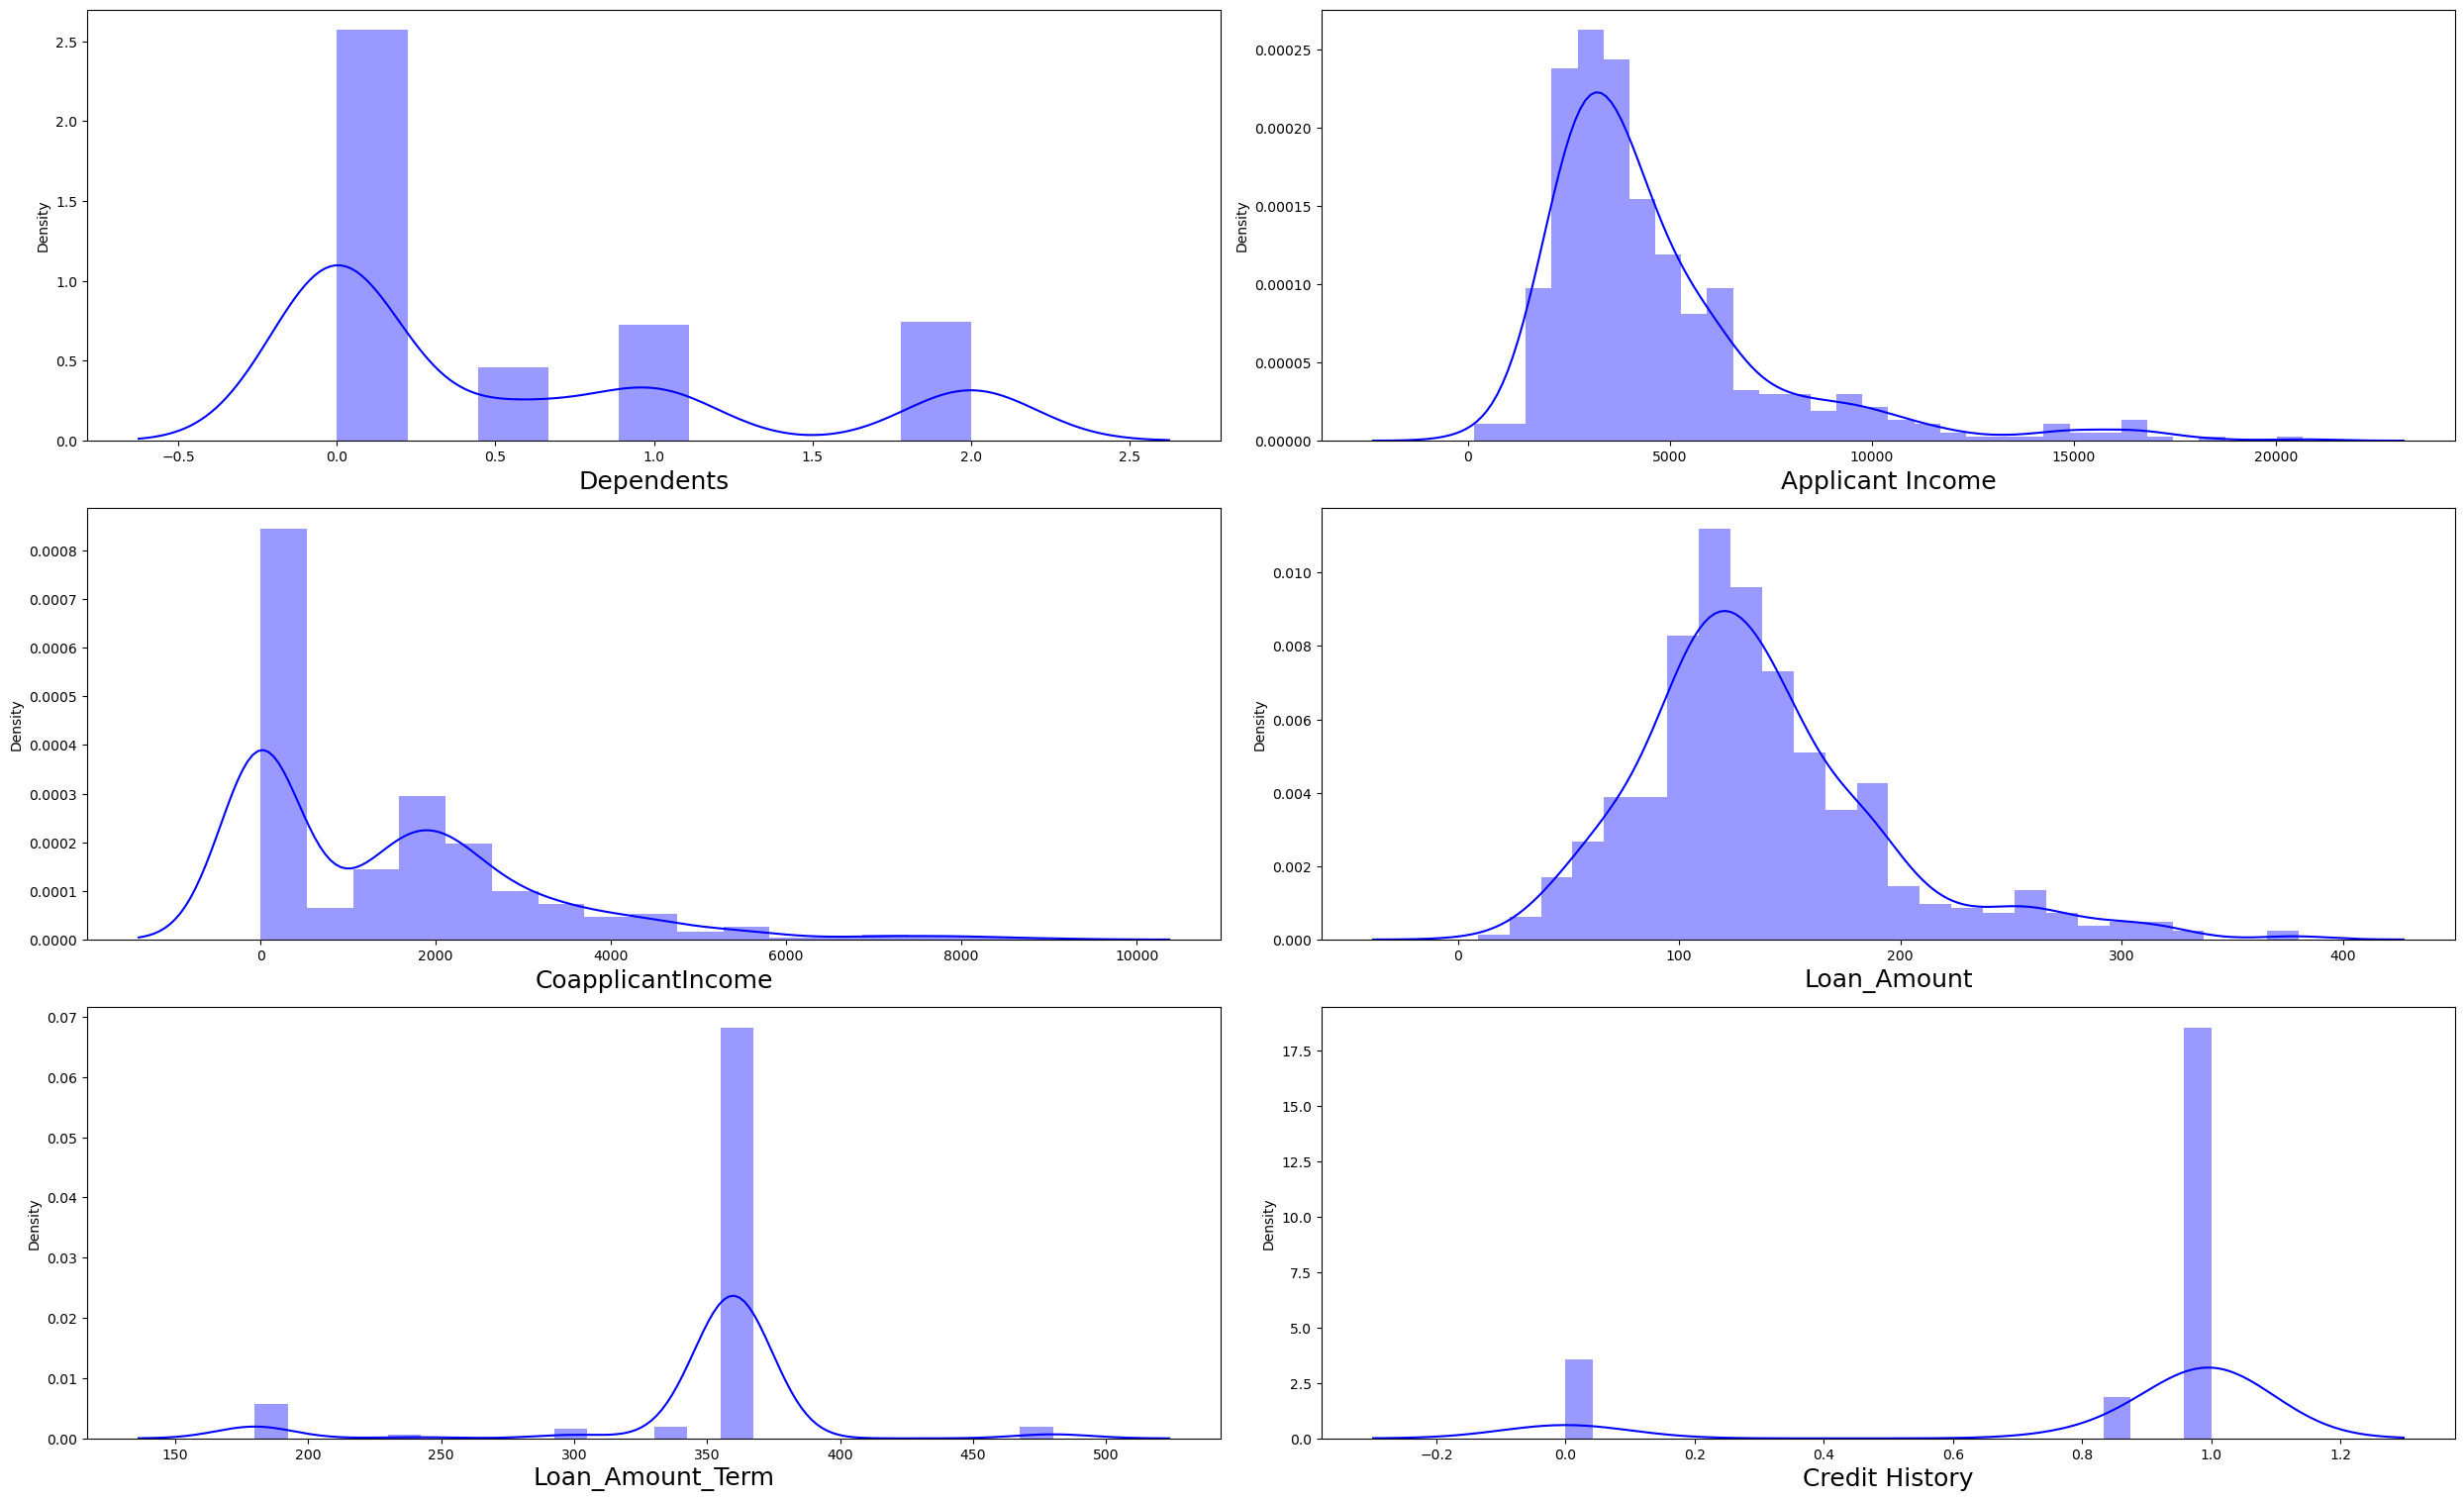

In [79]:
#checking distribution of data after attempting to remove skeweness
plt.figure(figsize = (25,50), facecolor = 'white')
plotnumber = 1

for column in numerical:
    if plotnumber <=12:
        ax = plt.subplot(10,2,plotnumber)
        sns.distplot(df1[column], color = 'blue')
        plt.xlabel(column,fontsize=18)
        
    plotnumber +=1
plt.tight_layout()

In [ ]:
#Dealing with multicollinearity.It be must removed but before that we need to seperate features and labels


In [80]:
#seperate the target and independent variables into x and y
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]
print("Feature Dimension=",x.shape)
print("Label Dimension=",y.shape)

Feature Dimension= (576, 11)
Label Dimension= (576,)


In [81]:
#Feature scaling and using standard scalarization to remove biasness
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

,Gender,Married,Dependents,Education,Self_Employed,Applicant Income,CoapplicantIncome,Loan_Amount,Loan_Amount_Term,Credit History,Property_Area
0,0.480384,0.734920,1.065419,-0.542570,-0.392821,0.236084,0.741621,-0.015106,0.14282,0.515800,-1.304968
1,0.480384,0.734920,-0.843770,-0.542570,2.545686,-0.525595,-1.124542,-1.441642,0.14282,0.515800,1.230147
2,0.480384,0.734920,-0.843770,1.843081,-0.392821,-0.790327,0.893992,-0.168977,0.14282,0.515800,1.230147
3,0.480384,-1.360693,-0.843770,-0.542570,-0.392821,0.729802,-1.124542,0.222044,0.14282,0.515800,1.230147
4,0.480384,0.734920,1.502753,-0.542570,2.545686,0.541602,1.098520,2.002482,0.14282,0.515800,1.230147
...,...,...,...,...,...,...,...,...,...,...,...
571,-2.081666,-1.360693,-0.843770,-0.542570,-0.392821,-0.585757,-1.124542,-1.300039,0.14282,0.515800,-1.304968
572,0.480384,0.734920,0.606013,-0.542570,-0.392821,0.036794,-1.124542,-2.320458,-2.55726,0.515800,-1.304968
573,0.480384,0.734920,1.065419,-0.542570,-0.392821,1.282087,0.169084,1.836736,0.14282,0.515800,1.230147
574,0.480384,0.734920,1.502753,-0.542570,-0.392821,1.164979,-1.124542,0.961351,0.14282,0.515800,1.230147


In [82]:
#Checking Variance inflation factor in each scaled column that is x.shape[1](1/(1-R2))
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["VIF values"]=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif["Features"]=x.columns
vif

,VIF values,Features
0,1.233591,Gender
1,1.445744,Married
2,1.181294,Dependents
3,1.066539,Education
4,1.055855,Self_Employed
5,1.766080,Applicant Income
6,1.572035,CoapplicantIncome
7,1.547536,Loan_Amount
8,1.045762,Loan_Amount_Term
9,1.013216,Credit History


In [ ]:
There is no multicollinearity .VIF is less that the minimum threshold of 10 therefore we proceed with model building

In [83]:
#Modelling

#Finding the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu = 0
maxRS = 0
for i in range (1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"at random_state",maxRS)

Best accuracy is  0.884393063583815 at random_state 167


In [85]:
#creating train test split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=maxRS)

In [86]:
#Import classification algorithms

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
from sklearn.model_selection import cross_val_score

In [87]:
#checking accuracy for Random Forest Classifier

RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8670520231213873
[[ 31  16]
 [  7 119]]
              precision    recall  f1-score   support

           0       0.82      0.66      0.73        47
           1       0.88      0.94      0.91       126

    accuracy                           0.87       173
   macro avg       0.85      0.80      0.82       173
weighted avg       0.86      0.87      0.86       173



In [88]:
#checking testing accuracy:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.8323699421965318
[[ 31  16]
 [ 13 113]]
              precision    recall  f1-score   support

           0       0.70      0.66      0.68        47
           1       0.88      0.90      0.89       126

    accuracy                           0.83       173
   macro avg       0.79      0.78      0.78       173
weighted avg       0.83      0.83      0.83       173



In [89]:
#checking accuracy of Logistic Regression

LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.884393063583815
[[ 30  17]
 [  3 123]]
              precision    recall  f1-score   support

           0       0.91      0.64      0.75        47
           1       0.88      0.98      0.92       126

    accuracy                           0.88       173
   macro avg       0.89      0.81      0.84       173
weighted avg       0.89      0.88      0.88       173



In [90]:
#checking accuracy for Support Vector Machine Classifier
SVC=SVC()
SVC.fit(x_train,y_train)
predSVC=SVC.predict(x_test)
print(accuracy_score(y_test,predSVC))
print(confusion_matrix(y_test,predSVC))
print(classification_report(y_test,predSVC))

0.8901734104046243
[[ 29  18]
 [  1 125]]
              precision    recall  f1-score   support

           0       0.97      0.62      0.75        47
           1       0.87      0.99      0.93       126

    accuracy                           0.89       173
   macro avg       0.92      0.80      0.84       173
weighted avg       0.90      0.89      0.88       173



In [91]:
#checking accuracy for Gradient Boosting Classifier
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.9017341040462428
[[ 31  16]
 [  1 125]]
              precision    recall  f1-score   support

           0       0.97      0.66      0.78        47
           1       0.89      0.99      0.94       126

    accuracy                           0.90       173
   macro avg       0.93      0.83      0.86       173
weighted avg       0.91      0.90      0.90       173



In [92]:
#checking accuracy for AdaBoost Classifier
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.861271676300578
[[ 31  16]
 [  8 118]]
              precision    recall  f1-score   support

           0       0.79      0.66      0.72        47
           1       0.88      0.94      0.91       126

    accuracy                           0.86       173
   macro avg       0.84      0.80      0.81       173
weighted avg       0.86      0.86      0.86       173



In [93]:
#checking accuracy for Bagging Classifier
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.8265895953757225
[[ 33  14]
 [ 16 110]]
              precision    recall  f1-score   support

           0       0.67      0.70      0.69        47
           1       0.89      0.87      0.88       126

    accuracy                           0.83       173
   macro avg       0.78      0.79      0.78       173
weighted avg       0.83      0.83      0.83       173



In [94]:
#checking accuracy for ExtraTreesClassifier
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8265895953757225
[[ 31  16]
 [ 14 112]]
              precision    recall  f1-score   support

           0       0.69      0.66      0.67        47
           1       0.88      0.89      0.88       126

    accuracy                           0.83       173
   macro avg       0.78      0.77      0.78       173
weighted avg       0.82      0.83      0.83       173



In [95]:
#Cross validation Score
from sklearn.model_selection import cross_val_score

In [96]:
#Checking CV score for Random Forest Classifier
score=cross_val_score(RFC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predRFC)-score.mean())

[0.80172414 0.77391304 0.76521739 0.80869565 0.8173913 ]
0.7933883058470765
Difference between Accuracy score and cross validation score is - 0.07366371727431076


In [97]:
#Checking CV score for KNeighbours Classifier
score=cross_val_score(KNN,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predKNN)-score.mean())

[0.77586207 0.73043478 0.74782609 0.83478261 0.7826087 ]
0.7743028485757122
Difference between Accuracy score and cross validation score is - 0.05806709362081963


In [98]:
#Checking CV score for Logistic Regression
score=cross_val_score(LR,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predLR)-score.mean())

[0.78448276 0.77391304 0.74782609 0.83478261 0.8173913 ]
0.7916791604197901
Difference between Accuracy score and cross validation score is - 0.09271390316402484


In [99]:
#Checking CV score for Support Vector Machine Classifier
score=cross_val_score(SVC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predSVC)-score.mean())

[0.81896552 0.7826087  0.7826087  0.84347826 0.82608696]
0.8107496251874062
Difference between Accuracy score and cross validation score is - 0.07942378521721805


In [100]:
#Checking CV score for Gradient Boosting Classifier
score=cross_val_score(GB,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predGB)-score.mean())

[0.76724138 0.75652174 0.7826087  0.79130435 0.84347826]
0.7882308845577211
Difference between Accuracy score and cross validation score is - 0.11350321948852171


In [101]:
#Checking CV score for AdaBoost Classifier
score=cross_val_score(ABC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predABC)-score.mean())

[0.75       0.75652174 0.75652174 0.82608696 0.82608696]
0.7830434782608696
Difference between Accuracy score and cross validation score is - 0.07822819803970837


In [102]:
#Checking CV score for Bagging Classifier
score=cross_val_score(BC,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predBC)-score.mean())

[0.77586207 0.76521739 0.8        0.74782609 0.8       ]
0.7777811094452775
Difference between Accuracy score and cross validation score is - 0.04880848593044507


In [103]:
#Checking CV score for ExtraTreesClassifier
score=cross_val_score(ET,x,y)
print(score)
print(score.mean())
print("Difference between Accuracy score and cross validation score is -",accuracy_score(y_test,predET)-score.mean())

[0.79310345 0.73913043 0.8        0.8        0.76521739]
0.7794902548725637
Difference between Accuracy score and cross validation score is - 0.04709934050315878


In [ ]:
#Model selected

I chose ExtraTreesClassifier the least  difference between accuracy and cross validation score 

In [104]:
#Hyper parameter tuning

from sklearn.model_selection import GridSearchCV
parameters={'criterion' : ['gini', 'entropy'], 
              'random_state' : [10, 50, 100, 250,1000],
              'max_depth' : [0, 10, 20, 30, 40], 
              'n_estimators': [50, 100, 200, 300, 400],
              'n_jobs':[-2,-1,1,2]}

GVC=GridSearchCV(ExtraTreesClassifier(),parameters,cv=5)
GVC.fit(x_train,y_train)

GVC.best_params_
{'criterion':'gini','random_state':1000,'max_depth':10,'n_estimators':100,'n_jobs':-2}

Final_model=ExtraTreesClassifier(criterion='entropy',random_state=50,max_depth=10,n_estimators=100,n_jobs=-2)
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

89.01734104046243


In [ ]:
The accuracy of Hyper parameter tuning has increased from 82.6%%  to 89.01% after hyperparameter tuning

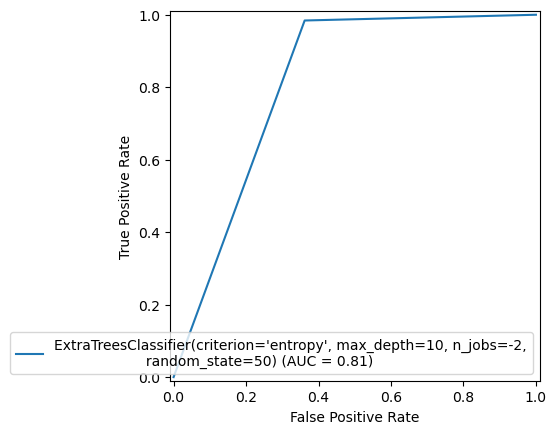

In [105]:
#Plotting ROC and compare AUC for  the model used
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

In [ ]:
The model has an AUC of 81% and accuracy of 89%

In [106]:
#Saving the model
import joblib
joblib.dump(Final_model,"Loan_Prediction.pkl")

['Loan_Prediction.pkl']

In [107]:
#Loading the saved model to get predictions
model=joblib.load("Loan_Prediction.pkl")

In [108]:
#Prediction
prediction=model.predict(x_test)
prediction

array([1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1])

In [109]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df
#the predictions for loan status

,Predicted,Original
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
168,0,0
169,1,1
170,1,1
171,1,1
